# Analyzing business questions

We first need to import the required  module and libraries:

In [1]:
import pandas as pd
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

We set a high number for pandas ``max_rows`` to be able to scroll through the DataFrame.

In [2]:
pd.set_option('display.max_rows', 1000)
pd.set_option("display.max_colwidth", 100)

Load our quality controlled DataFrames:

In [3]:
# orders_qu.csv
url = "https://drive.google.com/file/d/13WVPwZ9o2x81hcUn9JtcXzKdVCwaJY8F/view?usp=sharing"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
orders_qu = pd.read_csv(path, parse_dates=["created_date"])

# orderlines_qu.csv
url = "https://drive.google.com/file/d/1xa4DoYxHs_mgG3C9-s6IKYcMh51bkV7V/view?usp=sharing"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
orderlines_qu = pd.read_csv(path, parse_dates=["date"])

# product_category_qu.csv
url = "https://drive.google.com/file/d/1BUNBV3bKPACEKqMJ9k9eF7Y3mvyy1tXC/view?usp=sharing"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
product_category_qu = pd.read_csv(path)

# brands.csv
url = "https://drive.google.com/file/d/1LZFfFF6GY73kbEVbj6mhbU0I6dgOFgsn/view?usp=sharing"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
brands = pd.read_csv(path)

In [4]:
orders_qu_df=orders_qu.copy()
orderlines_qu_df=orderlines_qu.copy()
product_category_df = product_category_qu.copy()
brands_df=brands.copy()

## 1.&nbsp; Preparing required DataFrames

In [6]:
orderlines_orders_df = orderlines_qu_df.merge(orders_qu_df,
                                           how="inner",
                                           left_on="id_order",
                                           right_on="order_id")
orderlines_orders_df.sample(2)

,id,id_order,product_id,product_quantity,sku,unit_price,date,order_id,created_date,total_paid,state
47113,1586634,500847,0,1,BEL0180,119.99,2018-01-29 10:58:15,500847,2018-01-29 11:02:42,126.98,Completed
27541,1395010,420688,0,1,BEL0234,26.99,2017-11-01 13:15:00,420688,2017-11-01 13:37:51,68.97,Completed


In [7]:
product_category_df.rename(columns={'sku': 'sku_p'}, inplace=True)
product_category_df.sample(1)

,sku_p,name,desc,price,in_stock,type,category,category_level
2449,WAC0168,Wacom Intuos Creative Art Pen & Touch M Black,Graphical touch tablet with pen and digital toolbox for Mac and PC.,199.99,0,1405,graphic tablet,Graphics Tablet


In [8]:
orderlines_orders_products_df = orderlines_orders_df.merge(product_category_df,
                                           how="left",
                                           left_on="sku",
                                           right_on="sku_p")
orderlines_orders_products_df.sample(2)

,id,id_order,product_id,product_quantity,sku,unit_price,date,order_id,created_date,total_paid,state,sku_p,name,desc,price,in_stock,type,category,category_level
17723,1301621,381676,0,1,APP0410,32.99,2017-07-25 09:14:40,381676,2017-07-25 09:16:38,48.97,Completed,APP0410,Apple Thunderbolt to FireWire 800 adapter,Adapter Thunderbolt to Firewire 800 connection.,35.0,1,1325,cable,Accessories
21215,1328027,394221,0,1,APP0399,32.99,2017-08-30 06:43:06,394221,2017-08-30 06:52:50,77.98,Completed,APP0399,Apple Thunderbolt to Gigabit Ethernet Adapter Mac,Mac adapter Thunderbolt to Gigabit Ethernet (MD463ZM / A).,35.0,1,1325,cable,Accessories


In [9]:
orderlines_orders_products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53231 entries, 0 to 53230
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                53231 non-null  int64         
 1   id_order          53231 non-null  int64         
 2   product_id        53231 non-null  int64         
 3   product_quantity  53231 non-null  int64         
 4   sku               53231 non-null  object        
 5   unit_price        53231 non-null  float64       
 6   date              53231 non-null  datetime64[ns]
 7   order_id          53231 non-null  int64         
 8   created_date      53231 non-null  datetime64[ns]
 9   total_paid        53231 non-null  float64       
 10  state             53231 non-null  object        
 11  sku_p             53231 non-null  object        
 12  name              53231 non-null  object        
 13  desc              53231 non-null  object        
 14  price             5323

### 1.1.&nbsp; Step 1:

Create the `unit_price_total` as `orderlines.unit_price` * `orderlines.product_quantity`

In [11]:
all_orderlines_together = orderlines_orders_products_df.copy()

In [12]:
all_orderlines_together.loc[:, 'unit_price_total']=all_orderlines_together["product_quantity"]*all_orderlines_together["unit_price"]
all_orderlines_together.sample(2)

,id,id_order,product_id,product_quantity,sku,unit_price,date,order_id,created_date,total_paid,state,sku_p,name,desc,price,in_stock,type,category,category_level,unit_price_total
12911,1259566,361262,0,1,BNQ0042,699.0,2017-06-01 14:42:19,361262,2017-06-01 14:51:49,699.0,Completed,BNQ0042,"SW2700PT Monitor Benq 27 ""Professional Photography",Monitor 27 for photographic software professionals IPS technology integrated visor shading for M...,694.0,0,1296,Monitor,Monitor,699.0
13642,1268717,365919,0,1,APP1649,879.0,2017-06-15 13:22:52,365919,2017-06-15 13:30:04,2637.0,Completed,APP1649,Apple iPhone 7 128GB Silver,New Apple iPhone 7 128GB free Plata,749.0,0,85641716,Apple iPhone 7,Apple iPhone,879.0


### 1.2.&nbsp; Step 2:
Group by `id_order`, summarising by the sum of `unit_price_total`

In [15]:
all_orderlines_group = all_orderlines_together.copy()

In this approach, we first marged all tables and then group by "order_id" and aggregation(sum) on 'unit_price_total' and aggregation(mean) on 'total_paid'.
* The code below gets the Avg of the total_paid and since the total_paid for the rows with the same 'order_id' is the same, the Avg gives us the same original number.

In [16]:
all_orderlines_group=(all_orderlines_group
        .groupby("order_id")
        .agg(unit_price_tot_order=('unit_price_total', 'sum'), total_paid=('total_paid', 'mean'))
        )

In [17]:
all_orderlines_group.sample(3)

,unit_price_tot_order,total_paid
order_id,,
356168,749.99,749.99
451804,34.99,41.98
382658,739.00,739.00


In [19]:
shipping = all_orderlines_group.reset_index()
shipping.loc[:, 'diff_paid_selling'] = shipping['total_paid'] - shipping['unit_price_tot_order']
shipping.sample(3)

,order_id,unit_price_tot_order,total_paid,diff_paid_selling
33580,485061,32.99,37.98,4.99
28542,460643,24.99,29.98,4.99
25416,442146,17.98,21.97,3.99


## 2.&nbsp; Questions:

* A line plot for categorical discounts for different quarters:

### 2.1.&nbsp; Daily discount from the top 10 brands that generate the most revenue:

In [22]:
all_orderlines_together.sample(1)

,id,id_order,product_id,product_quantity,sku,unit_price,date,order_id,created_date,total_paid,state,sku_p,name,desc,price,in_stock,type,category,category_level,unit_price_total
32593,1440267,440542,0,1,LGE0040,271.66,2017-11-24 18:04:36,440542,2017-11-24 18:14:50,275.65,Completed,LGE0040,"29UB67-B LG Monitor 29 ""HDMI DP tiltable / pivotable / adjustable height",29 ultra widescreen IPS Monitor Dual Link-Up sRGB 99% for Mac and PC,349.0,1,1296,Monitor,Monitor,271.66


In [23]:
all_orderlines_together["discount"]=all_orderlines_together["price"]-all_orderlines_together["unit_price"]

In [24]:
all_orderlines_together['quarter'] = all_orderlines_together['date'].dt.quarter

In [25]:
all_orderlines_together['year'] = all_orderlines_together['date'].dt.year

In [26]:
all_orderlines_together["short"] = all_orderlines_together["sku"].str[:3]

In [27]:
all_with_brands_df = all_orderlines_together.merge(brands,
                                how="left",
                                on="short")

In [28]:
all_with_brands_df.sample(1)

,id,id_order,product_id,product_quantity,sku,unit_price,date,order_id,created_date,total_paid,...,in_stock,type,category,category_level,unit_price_total,discount,quarter,year,short,long
8853,1220047,342248,0,1,WAC0218-A,387.7,2017-04-03 11:24:03,342248,2017-04-03 14:11:04,392.7,...,0,1298,Open,Second hand,387.7,142.2,2,2017,WAC,Wacom


In [29]:
top_10_brands_list = (
                      list(
                          all_with_brands_df
                          .groupby("long", as_index=False)
                          ["total_paid"]
                          .sum()
                          .nlargest(10, "total_paid")
                          ["long"]
                          )
                      )

In [30]:
top_10_brands_list

['Apple',
 'OWC',
 'Western Digital',
 'LaCie',
 'Pack',
 'Crucial',
 'LG',
 'Wacom',
 'Dell',
 'Belkin']

In [31]:
all_with_brands_df["date"] = all_with_brands_df["date"].dt.date

In [32]:
all_with_brands_df.sample(1)

,id,id_order,product_id,product_quantity,sku,unit_price,date,order_id,created_date,total_paid,...,in_stock,type,category,category_level,unit_price_total,discount,quarter,year,short,long
20992,1326579,393573,0,1,BEL0224,39.99,2017-08-28,393573,2017-08-28 19:58:33,39.99,...,1,12585395,Adapter,Accessories,39.99,10.0,3,2017,BEL,Belkin


In [33]:
daily_totals_df = (
                  all_with_brands_df
                  .loc[all_with_brands_df["long"].isin(top_10_brands_list), :]
                  .groupby(["date", "long"], as_index=False)
                  ["discount"]
                  .sum()
                  )

In [34]:
daily_totals_df.rename(columns={"long": "Company"}, inplace=True)

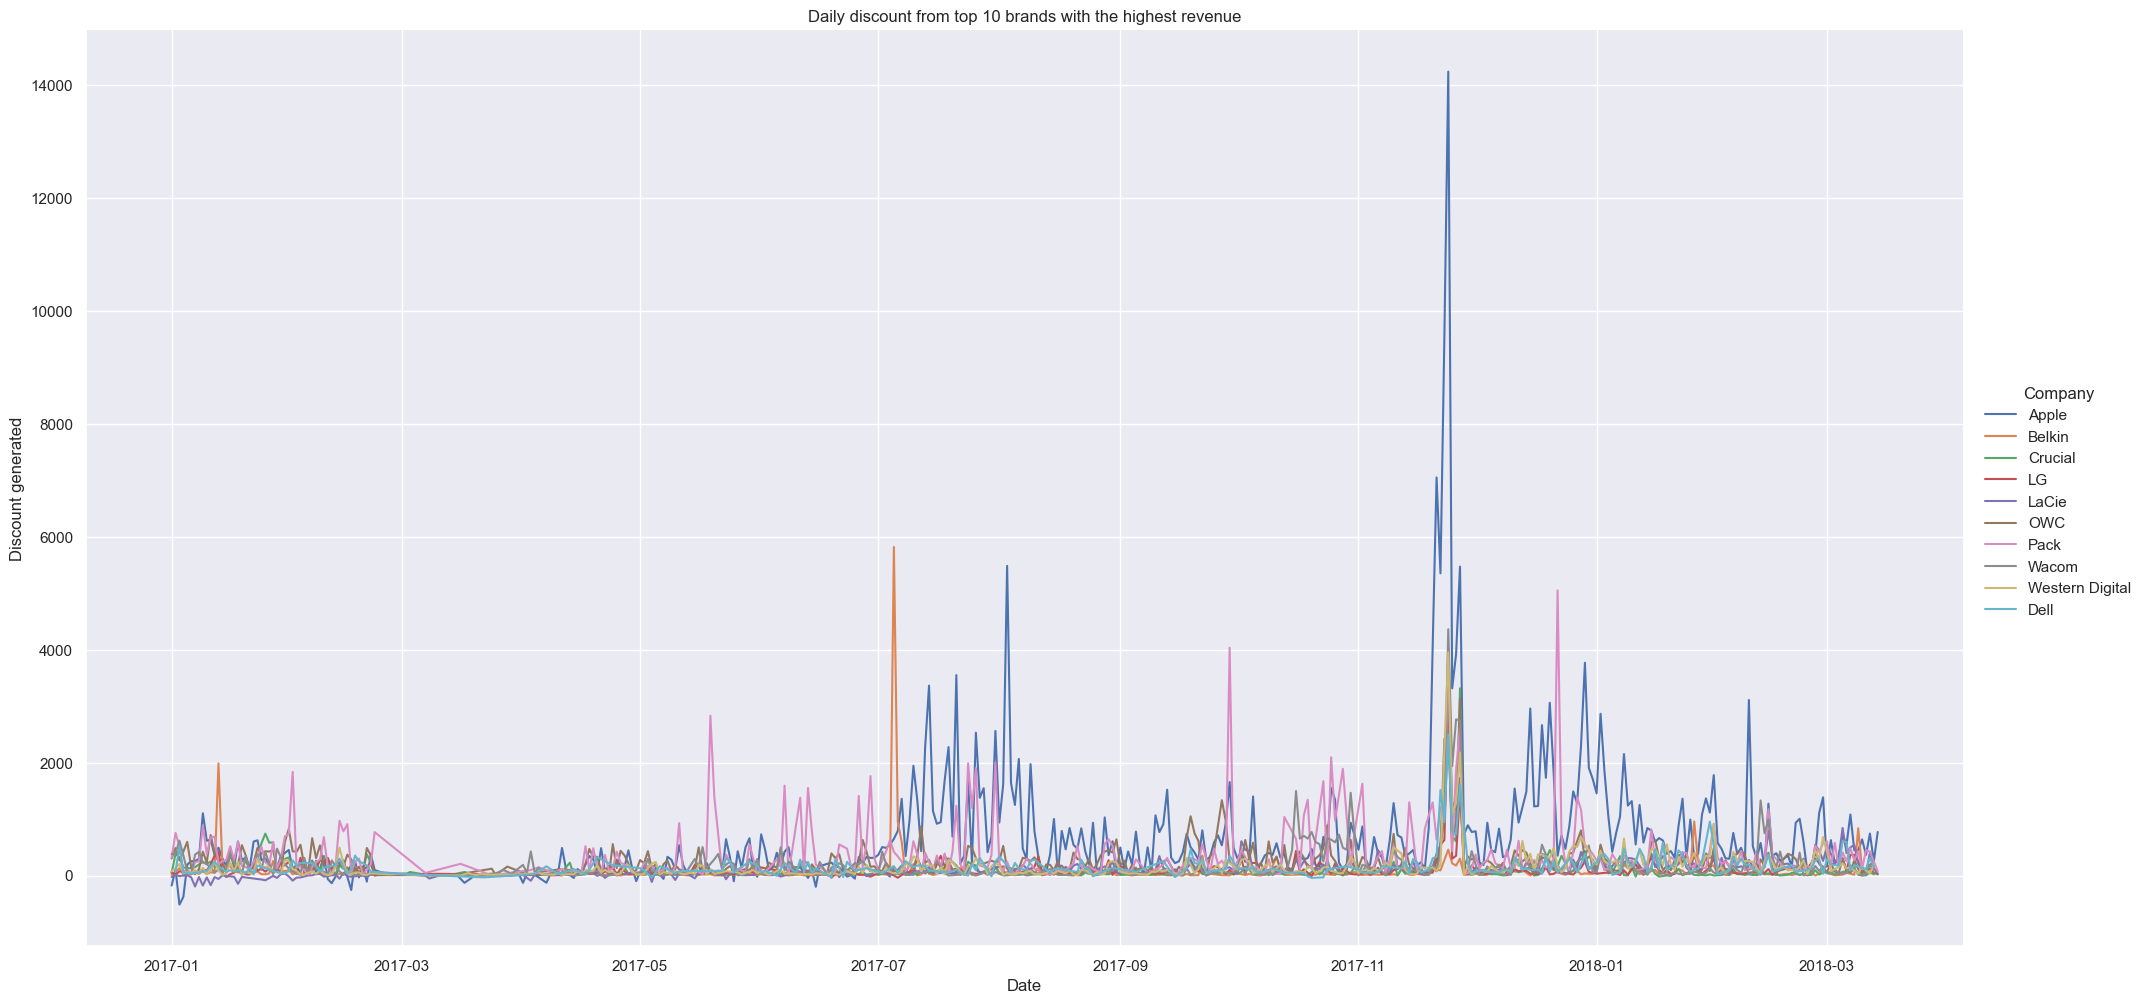

In [35]:
sns.set_theme(style="darkgrid")

(
sns.relplot(data = daily_totals_df,
            x="date",
            y="discount",
            hue="Company",
            kind="line",
            height= 10,
            aspect=2)
    .set_axis_labels("Date",
                     "Discount generated")
    .set(title="Daily discount from top 10 brands with the highest revenue")
);

### 2.2.&nbsp; Quarterly discount for different category levels:

In [36]:
category_level_y_q_df = (all_with_brands_df
                        .groupby(["category_level","year","quarter"], as_index=False)
                        ["discount"].sum())

In [37]:
category_level_y_q_df['year_quarter'] = ''

In [38]:
year_quarter_mask=category_level_y_q_df['year'] == 2018
category_level_y_q_df.loc[year_quarter_mask, 'year_quarter'] = 5

In [39]:
year_quarter_mask2=category_level_y_q_df['year'] == 2017
category_level_y_q_df.loc[year_quarter_mask2, 'year_quarter'] = category_level_y_q_df["quarter"]

In [40]:
category_level_y_q_df.sample(2)

,category_level,year,quarter,discount,year_quarter
36,Headphones,2017,3,9149.53,3
31,Graphics Tablet,2017,3,3167.00,3


In [42]:
category_level_y_q_df.groupby("category_level")["discount"].sum()

category_level
Accessories        285326.00
Apple Macbook       16342.19
Apple Watch         19922.13
Apple iMac          30845.89
Apple iPad          24198.87
Apple iPhone        53739.46
Graphics Tablet     60009.55
Headphones          68998.81
Memory Storage     357888.85
Monitor             79719.58
Network             50783.17
Other              200457.05
Second hand         82825.05
Service             24005.47
Speakers            35154.56
Name: discount, dtype: float64

In [43]:
# Define a consistent color palette based on the unique categories
unique_categories = category_level_y_q_df['category_level'].unique()
palette = sns.color_palette("dark", len(unique_categories))
color_mapping = dict(zip(unique_categories, palette))

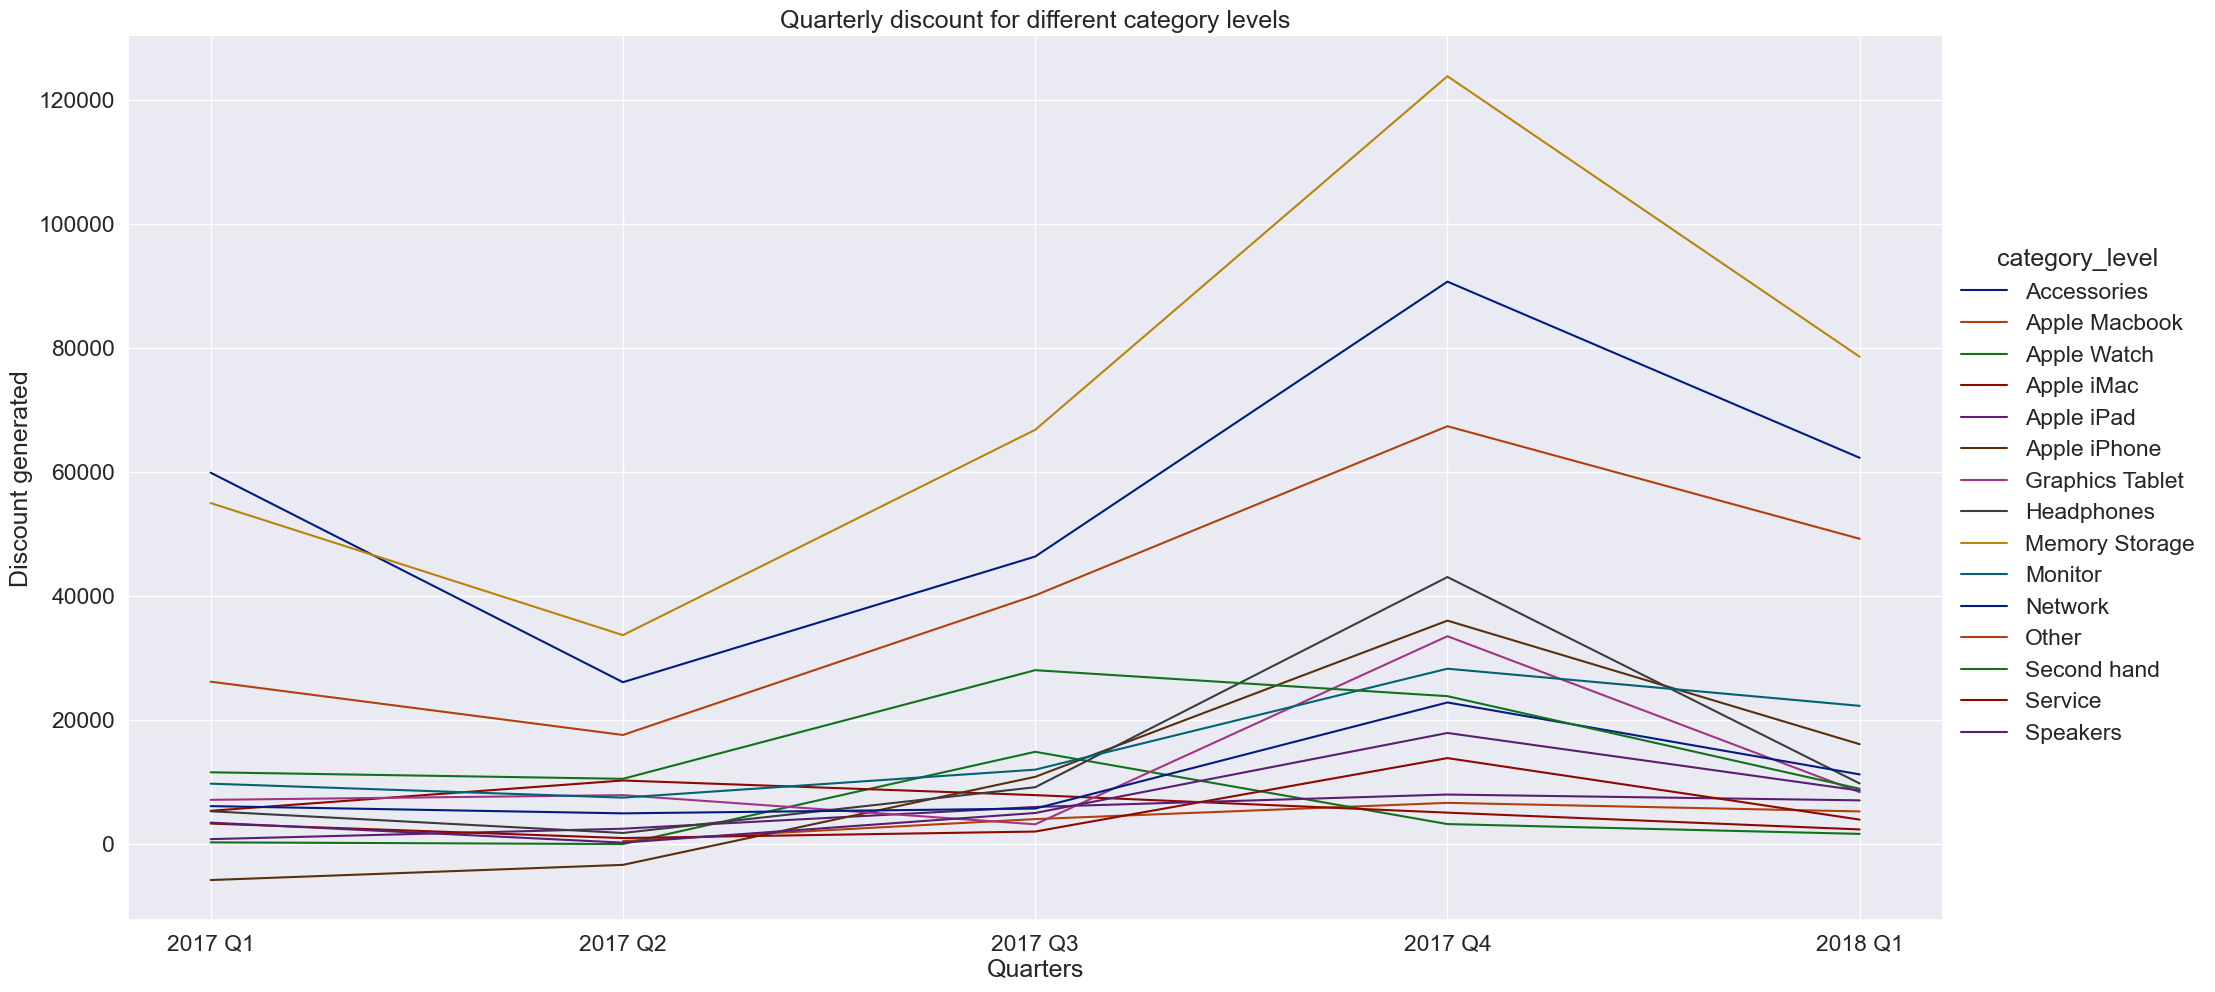

In [ ]:
sns.set_theme(style="darkgrid")
sns.set(font_scale=1.5)

(
sns.relplot(data = category_level_y_q_df,
            x="year_quarter",
            y="discount",
            hue="category_level",
            kind="line",
            height= 10,
            palette=color_mapping,
            aspect=2)
    .set_axis_labels("Quarters",
                     "Discount generated")
    .set(title="Quarterly discount for different category levels")
    .set(xticklabels=["2017 Q1", "2017 Q2", "2017 Q3", "2017 Q4", "2018 Q1"])
);

plt.xticks([1, 2, 3, 4, 5]);

### 2.3.&nbsp; Quarterly discount for Apple categories:


In [45]:
category_level_y_q_df.sample(1)

,category_level,year,quarter,discount,year_quarter
48,Monitor,2018,1,22275.8,5


In [46]:
Apple_mask=category_level_y_q_df["category_level"].isin(["Apple Macbook","Apple Watch","Apple iMac","Apple iPad","Apple iPhone"])
Apple_category=category_level_y_q_df.loc[Apple_mask]

In [47]:
Apple_category.sample(1)

,category_level,year,quarter,discount,year_quarter
10,Apple Watch,2017,2,-18.99,2


In [48]:
Apple_category.groupby("category_level")["discount"].sum()

category_level
Apple Macbook    16342.19
Apple Watch      19922.13
Apple iMac       30845.89
Apple iPad       24198.87
Apple iPhone     53739.46
Name: discount, dtype: float64

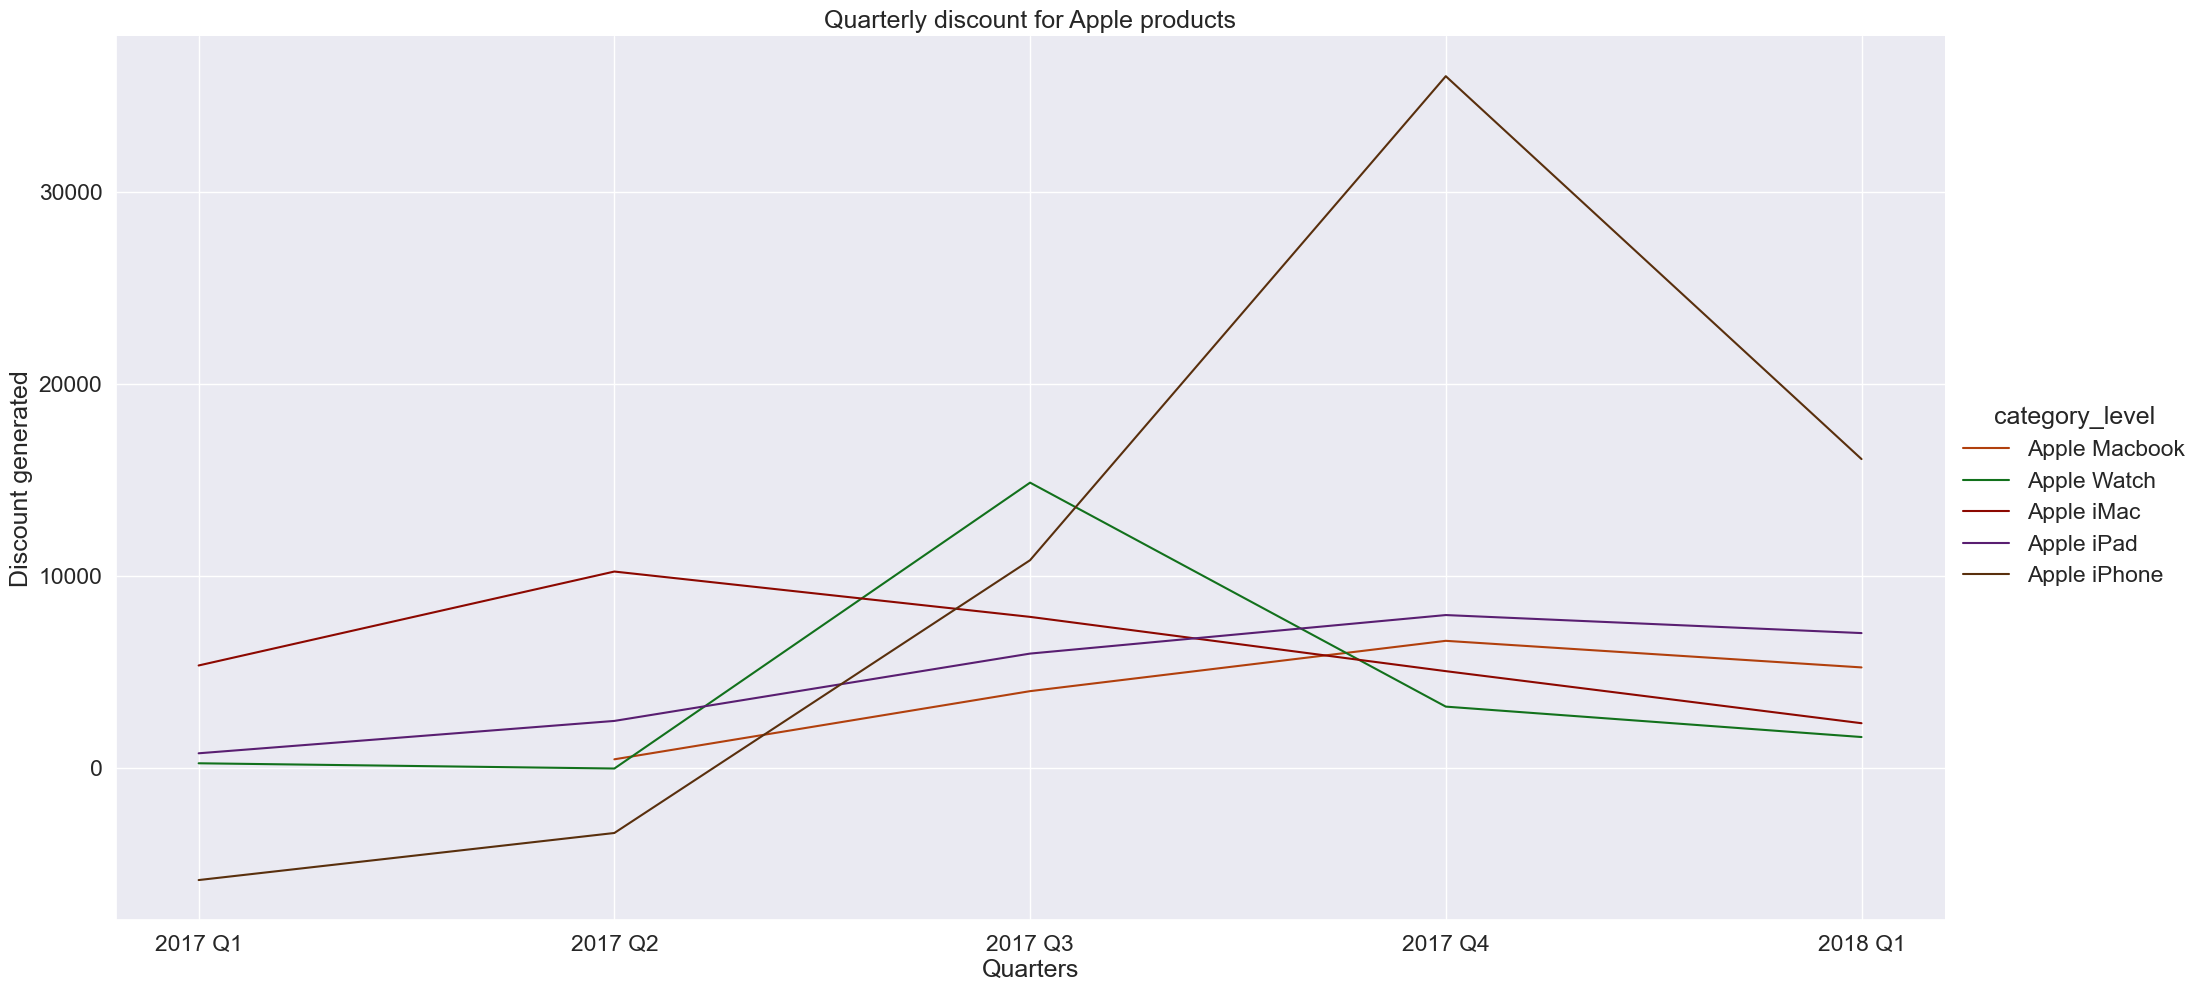

In [49]:
sns.set_theme(style="darkgrid")
sns.set(font_scale=1.5)

(
sns.relplot(data = Apple_category,
            x="year_quarter",
            y="discount",
            hue="category_level",
            kind="line",
            height= 10,
            palette=color_mapping,
            aspect=2)
    .set_axis_labels("Quarters",
                     "Discount generated")
    .set(title="Quarterly discount for Apple products")
    .set(xticklabels=["2017 Q1", "2017 Q2", "2017 Q3", "2017 Q4", "2018 Q1"])
);

plt.xticks([1, 2, 3, 4, 5]);

### 2.4.&nbsp; Quarterly discount for non-Apple categories:

In [50]:
Apple_mask=category_level_y_q_df["category_level"].isin(["Apple Macbook","Apple Watch","Apple iMac","Apple iPad","Apple iPhone"])
NOT_Apple_category=category_level_y_q_df.loc[~(Apple_mask)]

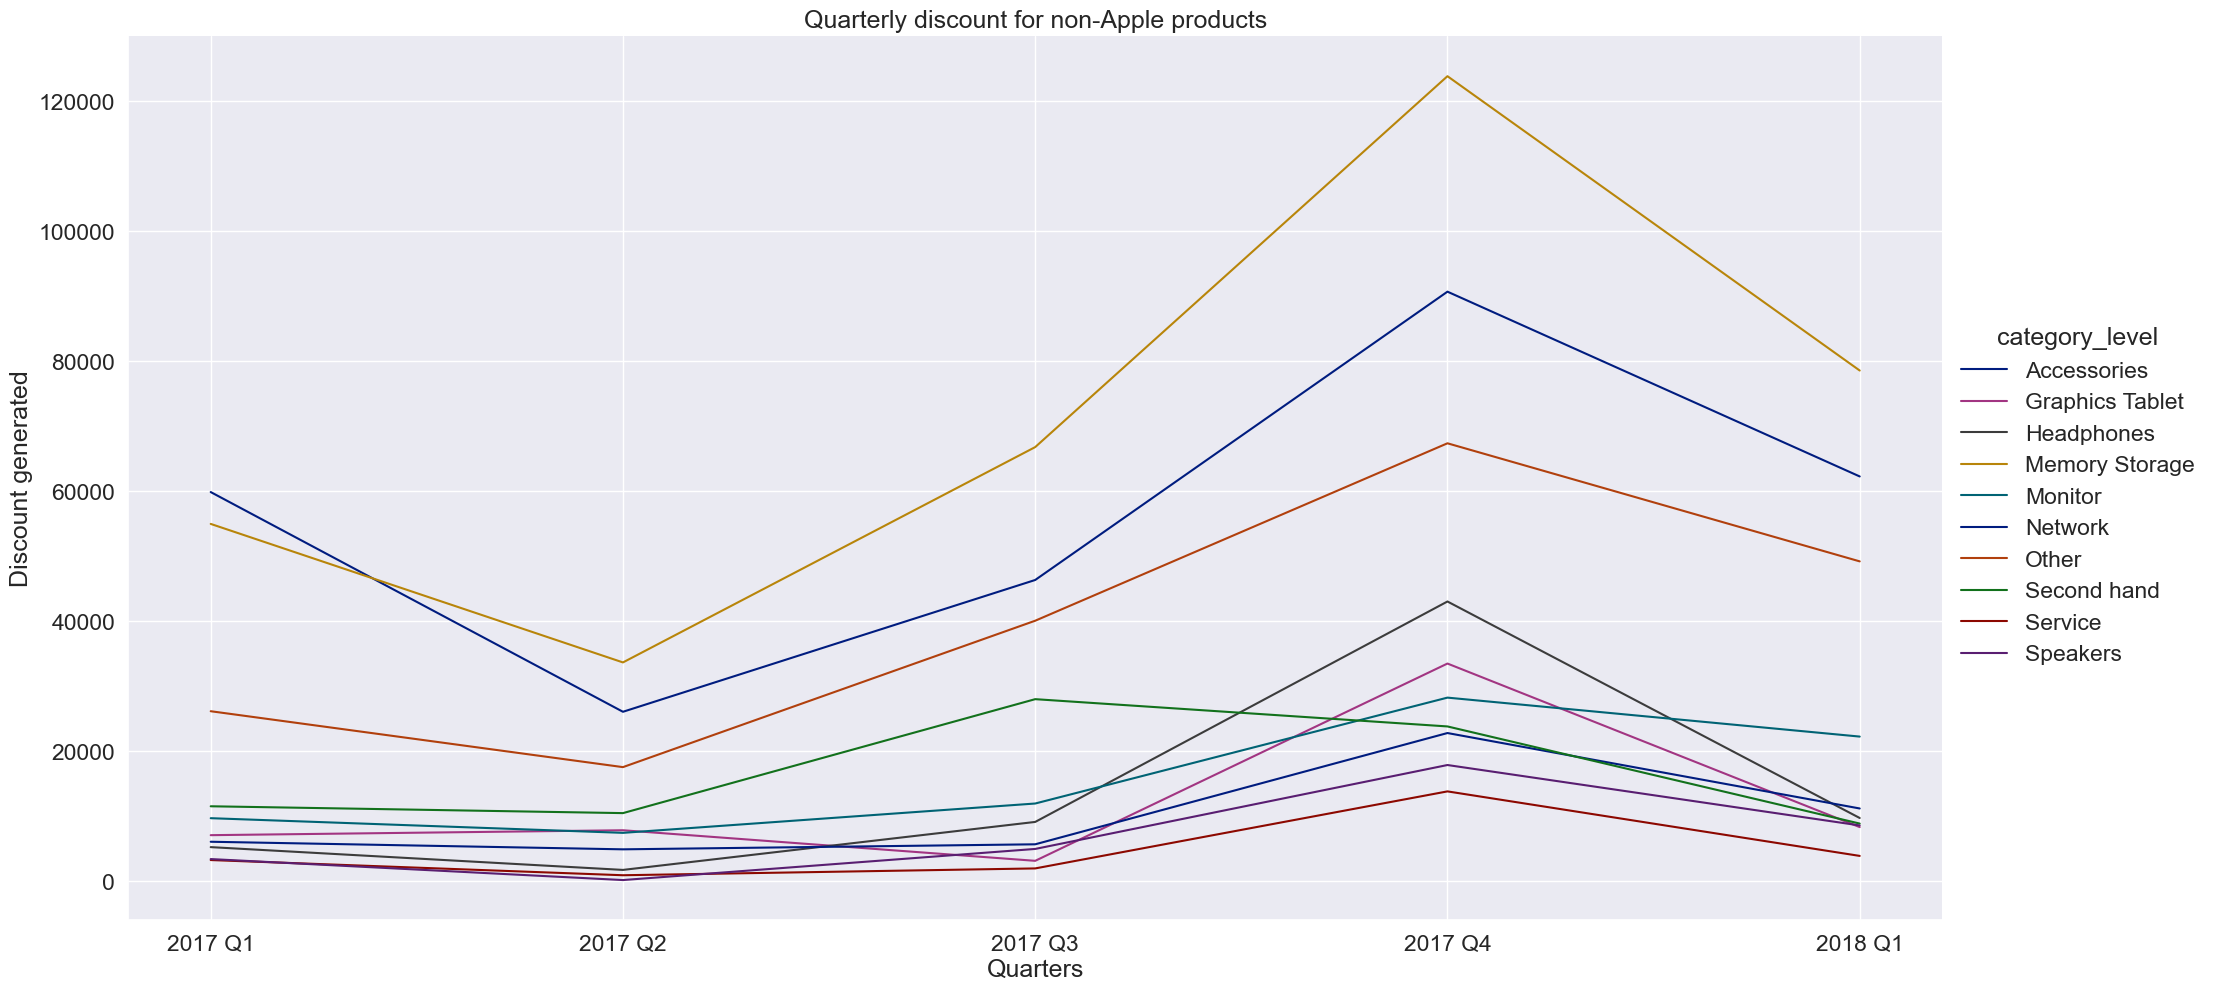

In [51]:
sns.set_theme(style="darkgrid")
sns.set(font_scale=1.5)

(
sns.relplot(data = NOT_Apple_category,
            x="year_quarter",
            y="discount",
            hue="category_level",
            kind="line",
            height= 10,
            palette=color_mapping,
            aspect=2)
    .set_axis_labels("Quarters",
                     "Discount generated")
    .set(title="Quarterly discount for non-Apple products")
    .set(xticklabels=["2017 Q1", "2017 Q2", "2017 Q3", "2017 Q4", "2018 Q1"])
);

plt.xticks([1, 2, 3, 4, 5]);

### 2.5.&nbsp; products that generate the most revenue quarterly:

In [52]:
all_orderlines_together.sample(1)

,id,id_order,product_id,product_quantity,sku,unit_price,date,order_id,created_date,total_paid,...,price,in_stock,type,category,category_level,unit_price_total,discount,quarter,year,short
139,1120389,300173,0,1,MOX0030,8.99,2017-01-02 00:54:27,300173,2017-01-02 00:59:21,37.97,...,9.99,0,14365395,other,Other,8.99,1.0,1,2017,MOX


In [53]:
all_orderlines_together['year_quarter'] = ''

In [54]:
year_quarter_mask=all_orderlines_together['year'] == 2018
all_orderlines_together.loc[year_quarter_mask, 'year_quarter'] = 5

In [55]:
year_quarter_mask2=all_orderlines_together['year'] == 2017
all_orderlines_together.loc[year_quarter_mask2, 'year_quarter'] = all_orderlines_together["quarter"]

In [56]:
all_orderlines_together.sample(1)

,id,id_order,product_id,product_quantity,sku,unit_price,date,order_id,created_date,total_paid,...,in_stock,type,category,category_level,unit_price_total,discount,quarter,year,short,year_quarter
51094,1626738,517257,0,1,DLL0048,123.99,2018-02-25 18:53:07,517257,2018-02-25 19:03:19,127.98,...,0,1296,Monitor,Monitor,123.99,11.0,1,2018,DLL,5


In [57]:
unit_price_total_df = (
    all_orderlines_together
    .groupby(["category_level","year_quarter"])
    .agg({"unit_price_total": ["sum","count"]})
)

In [58]:
unit_price_total_df.sample(1)

unit_price_total      
                                         sum count
category_level year_quarter                       
Service        4                    48134.34   625

In [59]:
unit_price_total_df = unit_price_total_df.reset_index()

In [60]:
unit_price_total_df.columns = ['_'.join(col).strip() for col in unit_price_total_df.columns.values]

In [61]:
unit_price_total_df.sample(1)

,category_level_,year_quarter_,unit_price_total_sum,unit_price_total_count
41,Memory Storage,3,403914.93,2223


In [62]:
unit_price_total_df.rename(columns={"category_level_": "category_level"}, inplace=True)

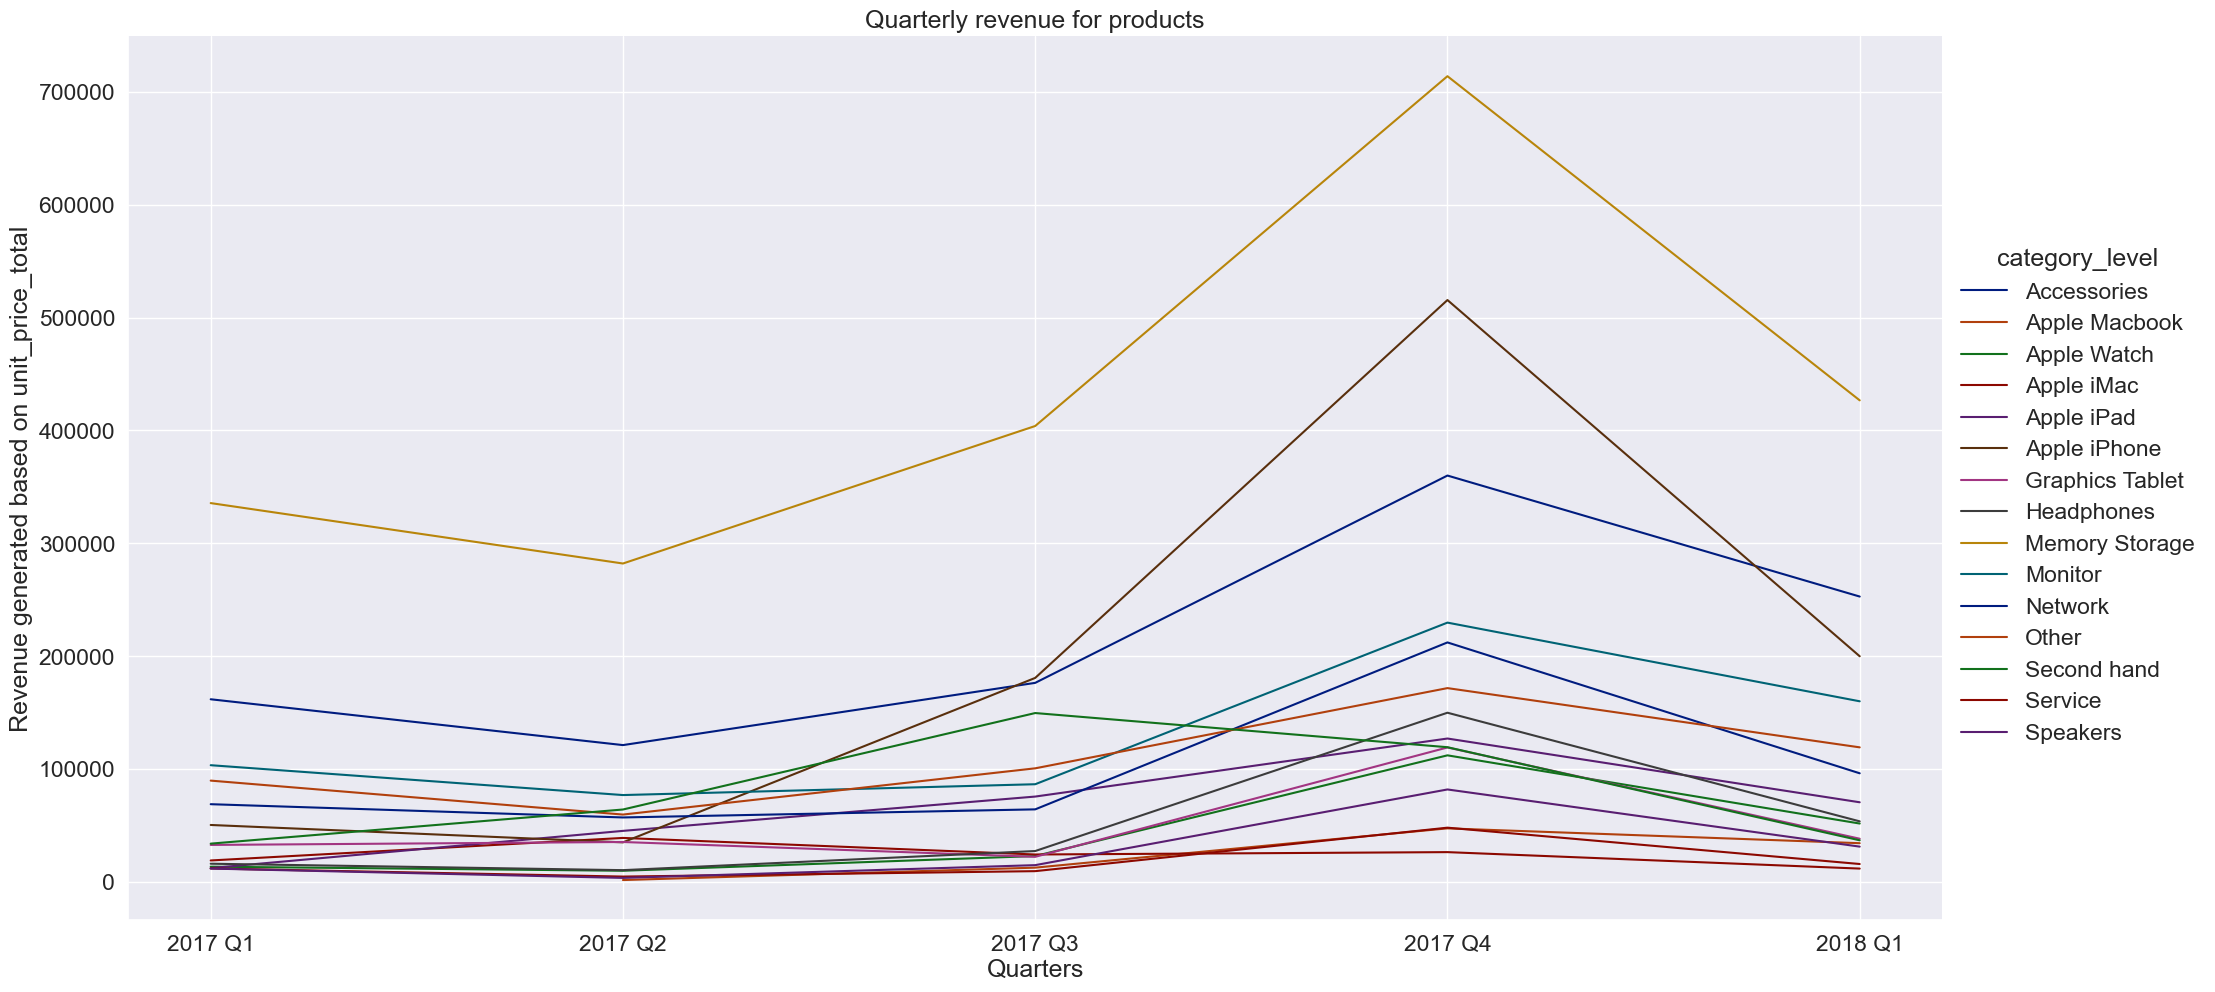

In [63]:
sns.set_theme(style="darkgrid")
sns.set(font_scale=1.5)
sns.set_palette("tab20")

(
sns.relplot(data = unit_price_total_df,
            x="year_quarter_",
            y='unit_price_total_sum',
            hue="category_level",
            kind="line",
            height= 10,
            palette=color_mapping,
            aspect=2)
    .set_axis_labels("Quarters",
                     "Revenue generated based on unit_price_total")
    .set(title="Quarterly revenue for products")
    .set(xticklabels=["2017 Q1", "2017 Q2", "2017 Q3", "2017 Q4", "2018 Q1"])
);

plt.xticks([1, 2, 3, 4, 5]);

### 2.6.&nbsp; Apple products that generate the most revenue quarterly:

In [64]:
Apple_mask=unit_price_total_df["category_level"].isin(["Apple Macbook","Apple Watch","Apple iMac","Apple iPad","Apple iPhone"])
Apple_unit_price_total_df=unit_price_total_df.loc[Apple_mask]

In [65]:
Apple_unit_price_total_df.sample(1)

,category_level,year_quarter_,unit_price_total_sum,unit_price_total_count
6,Apple Macbook,3,12726.14,15


Text(4, 515488.63, 'Max: 515487.13')

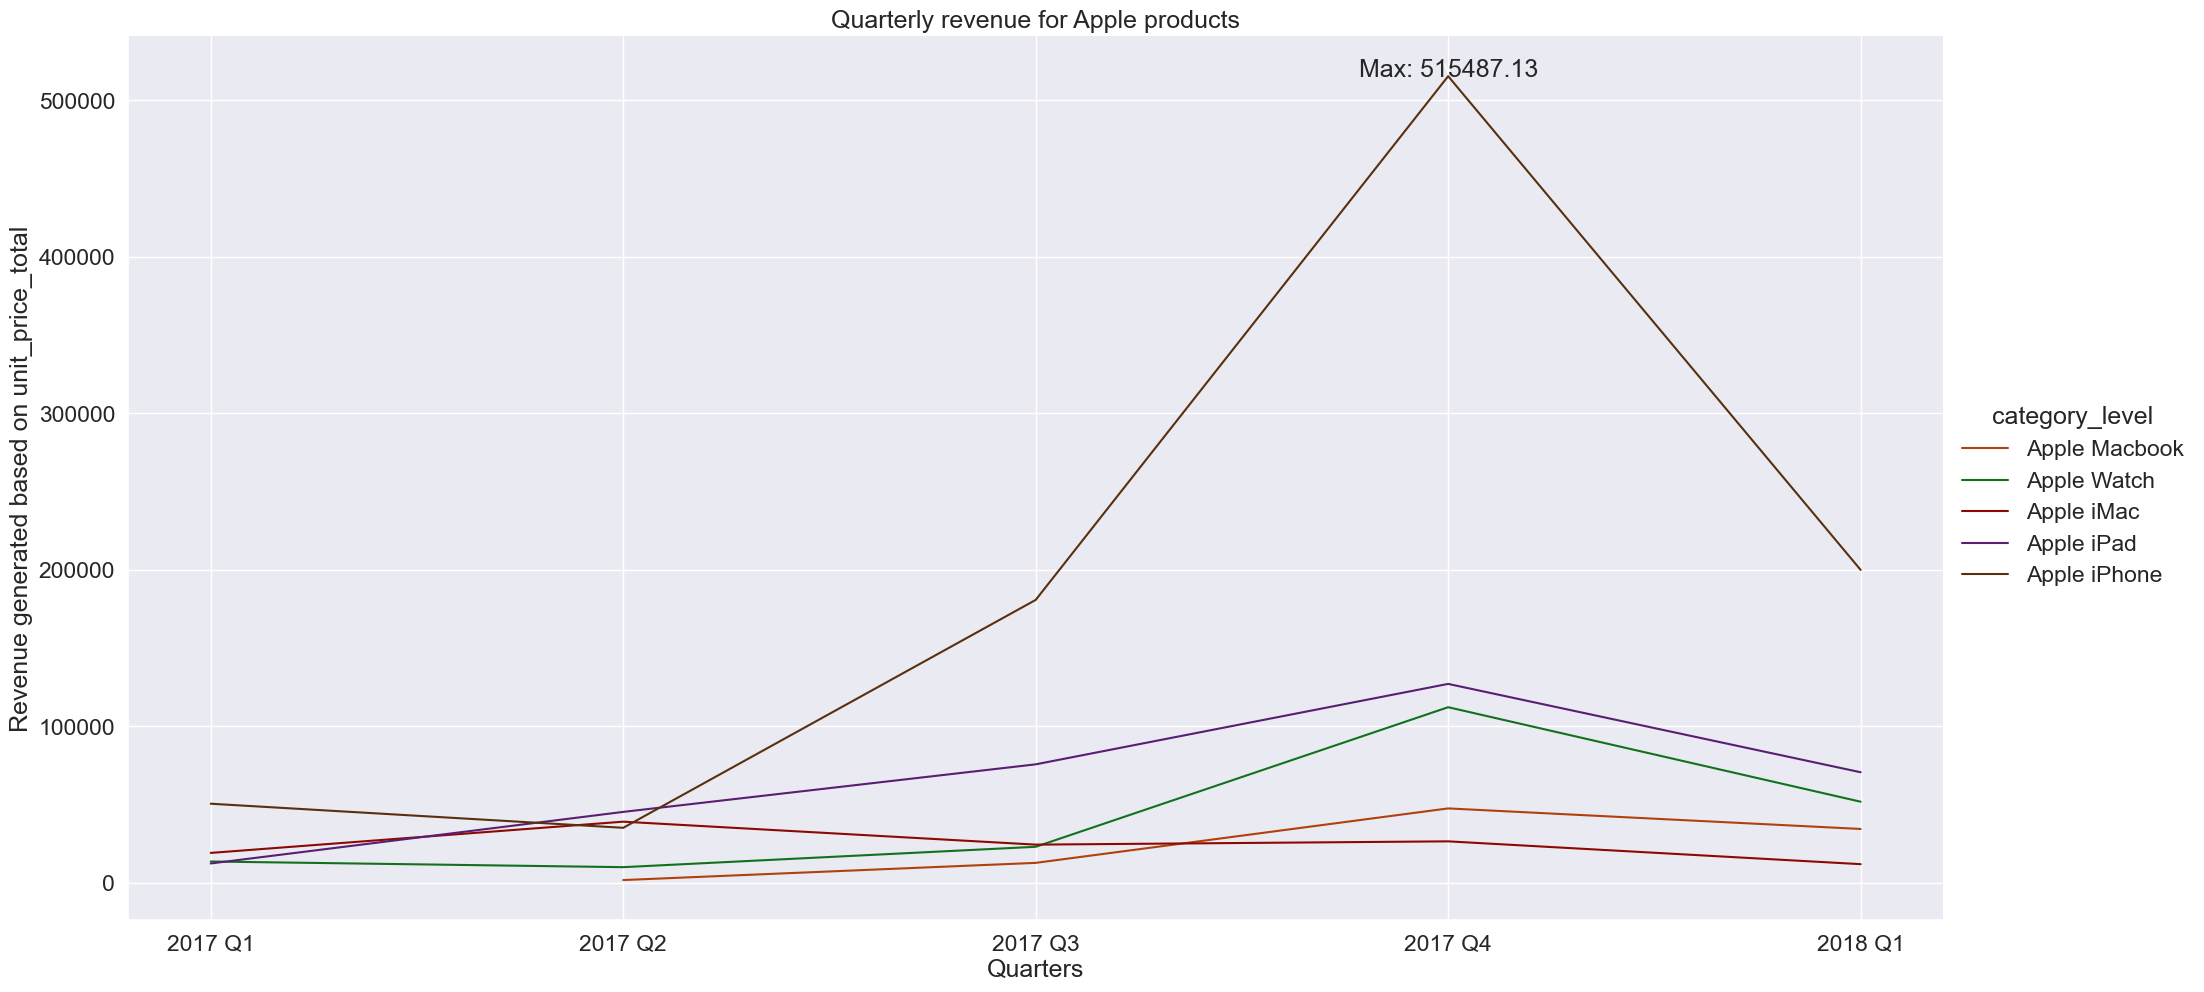

In [66]:
sns.set_theme(style="darkgrid")
sns.set(font_scale=1.5)
sns.set_palette("tab20")

(
sns.relplot(data = Apple_unit_price_total_df,
            x="year_quarter_",
            y='unit_price_total_sum',
            hue="category_level",
            kind="line",
            height= 10,
            palette=color_mapping,
            aspect=2)
    .set_axis_labels("Quarters",
                     "Revenue generated based on unit_price_total")
    .set(title="Quarterly revenue for Apple products")
    .set(xticklabels=["2017 Q1", "2017 Q2", "2017 Q3", "2017 Q4", "2018 Q1"])
);

plt.xticks([1, 2, 3, 4, 5]);

# Find the peak position
peak_x = Apple_unit_price_total_df["year_quarter_"][Apple_unit_price_total_df['unit_price_total_sum'].idxmax()]
peak_y = Apple_unit_price_total_df['unit_price_total_sum'].max()

# Annotate the peak position
plt.annotate(f'Max: {peak_y}', xy=(peak_x, peak_y), xytext=(peak_x, peak_y+1.5),
             arrowprops=dict(facecolor='black', arrowstyle="->"), ha='center')

Text(4, 515488.63, 'Max: 515487.13')

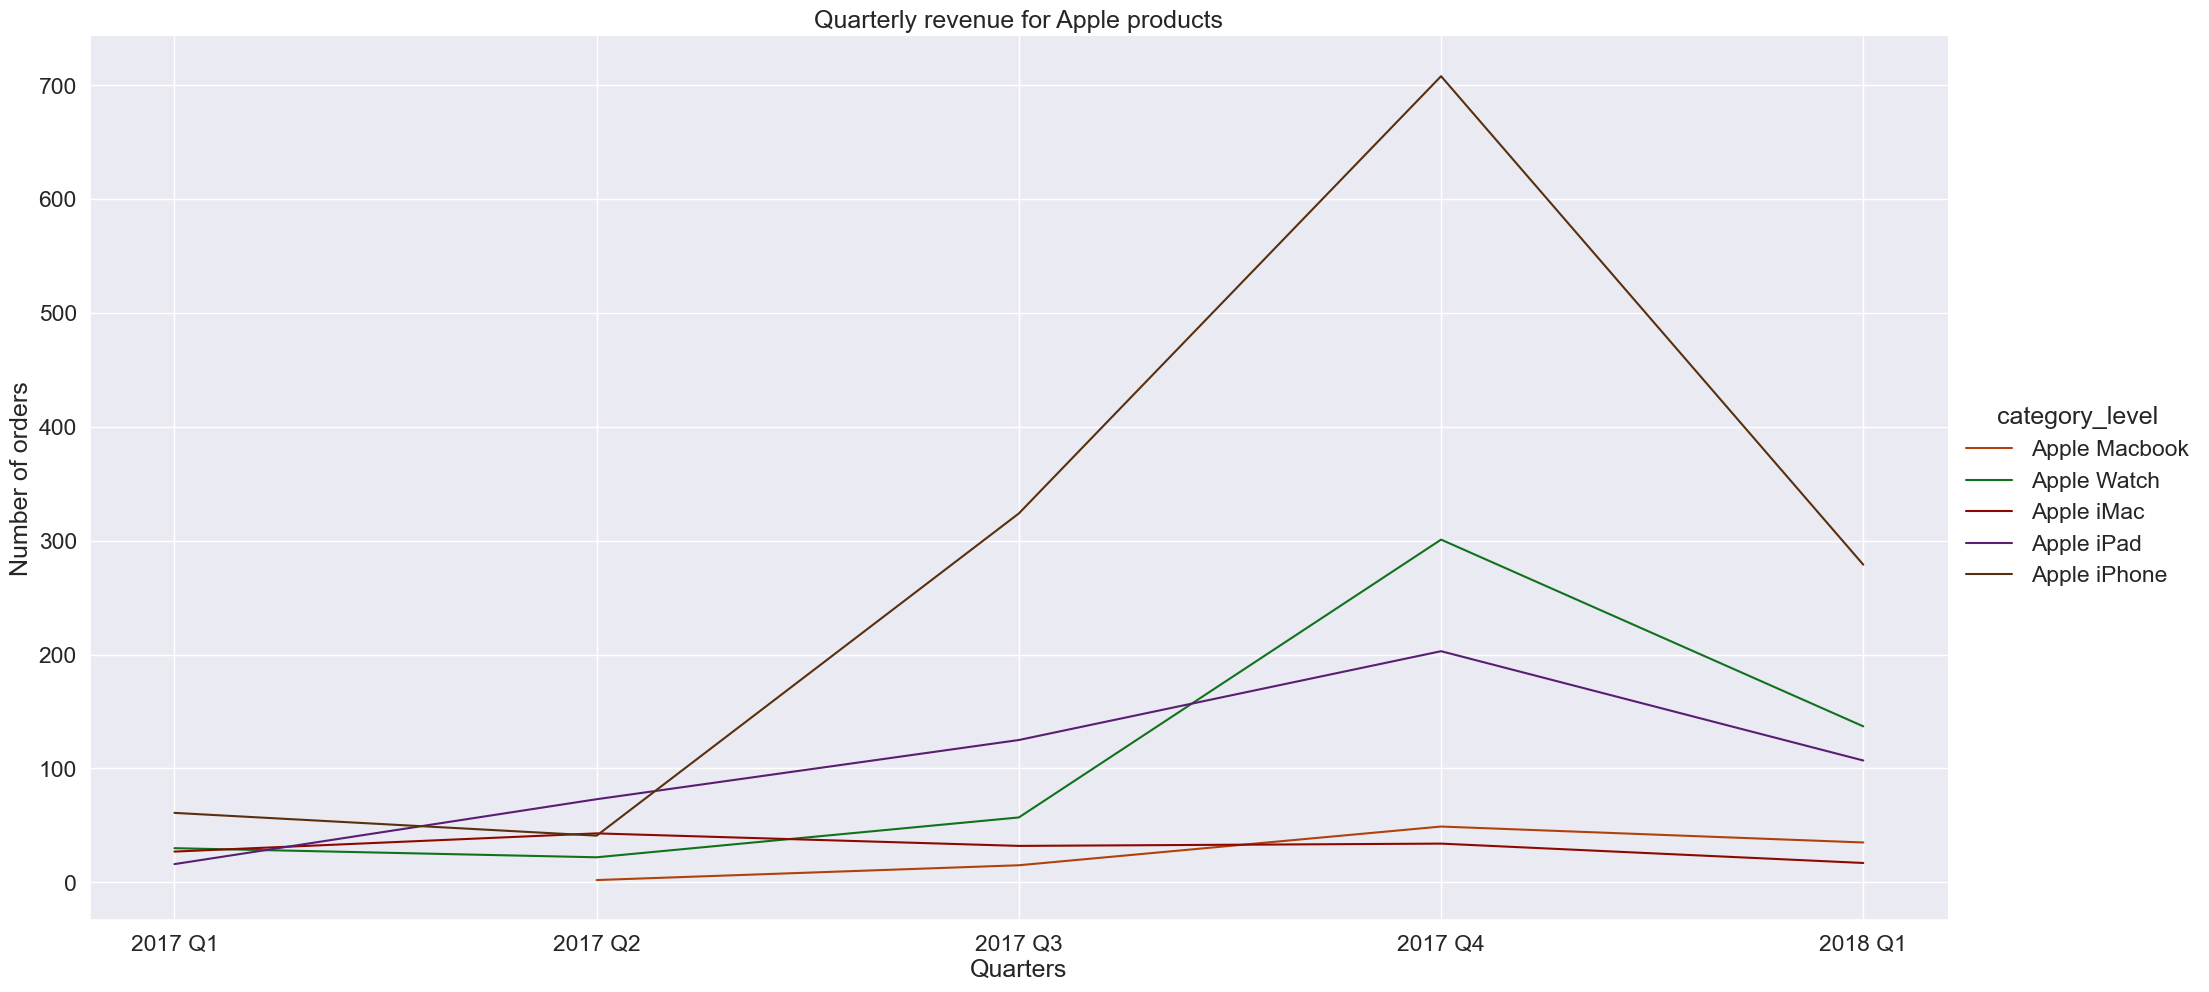

In [67]:
sns.set_theme(style="darkgrid")
sns.set(font_scale=1.5)
sns.set_palette("tab20")

(
sns.relplot(data = Apple_unit_price_total_df,
            x="year_quarter_",
            y='unit_price_total_count',
            hue="category_level",
            kind="line",
            height= 10,
            palette=color_mapping,
            aspect=2)
    .set_axis_labels("Quarters",
                     "Number of orders")
    .set(title="Quarterly revenue for Apple products")
    .set(xticklabels=["2017 Q1", "2017 Q2", "2017 Q3", "2017 Q4", "2018 Q1"])
);

plt.xticks([1, 2, 3, 4, 5]);

# Find the peak position
peak_x = Apple_unit_price_total_df["year_quarter_"][Apple_unit_price_total_df['unit_price_total_sum'].idxmax()]
peak_y = Apple_unit_price_total_df['unit_price_total_sum'].max()

# Annotate the peak position
plt.annotate(f'Max: {peak_y}', xy=(peak_x, peak_y), xytext=(peak_x, peak_y+1.5),
             arrowprops=dict(facecolor='black', arrowstyle="->"), ha='center')

### 2.7.&nbsp; NON-Apple products that generate the most revenue quarterly:

In [68]:
Apple_mask=unit_price_total_df["category_level"].isin(["Apple Macbook","Apple Watch","Apple iMac","Apple iPad","Apple iPhone"])
Non_Apple_unit_price_total_df=unit_price_total_df.loc[~(Apple_mask)]

In [69]:
Non_Apple_unit_price_total_df.sample(1)

,category_level,year_quarter_,unit_price_total_sum,unit_price_total_count
38,Headphones,5,53731.99,460


Text(4, 713759.1, 'Max: 713757.6')

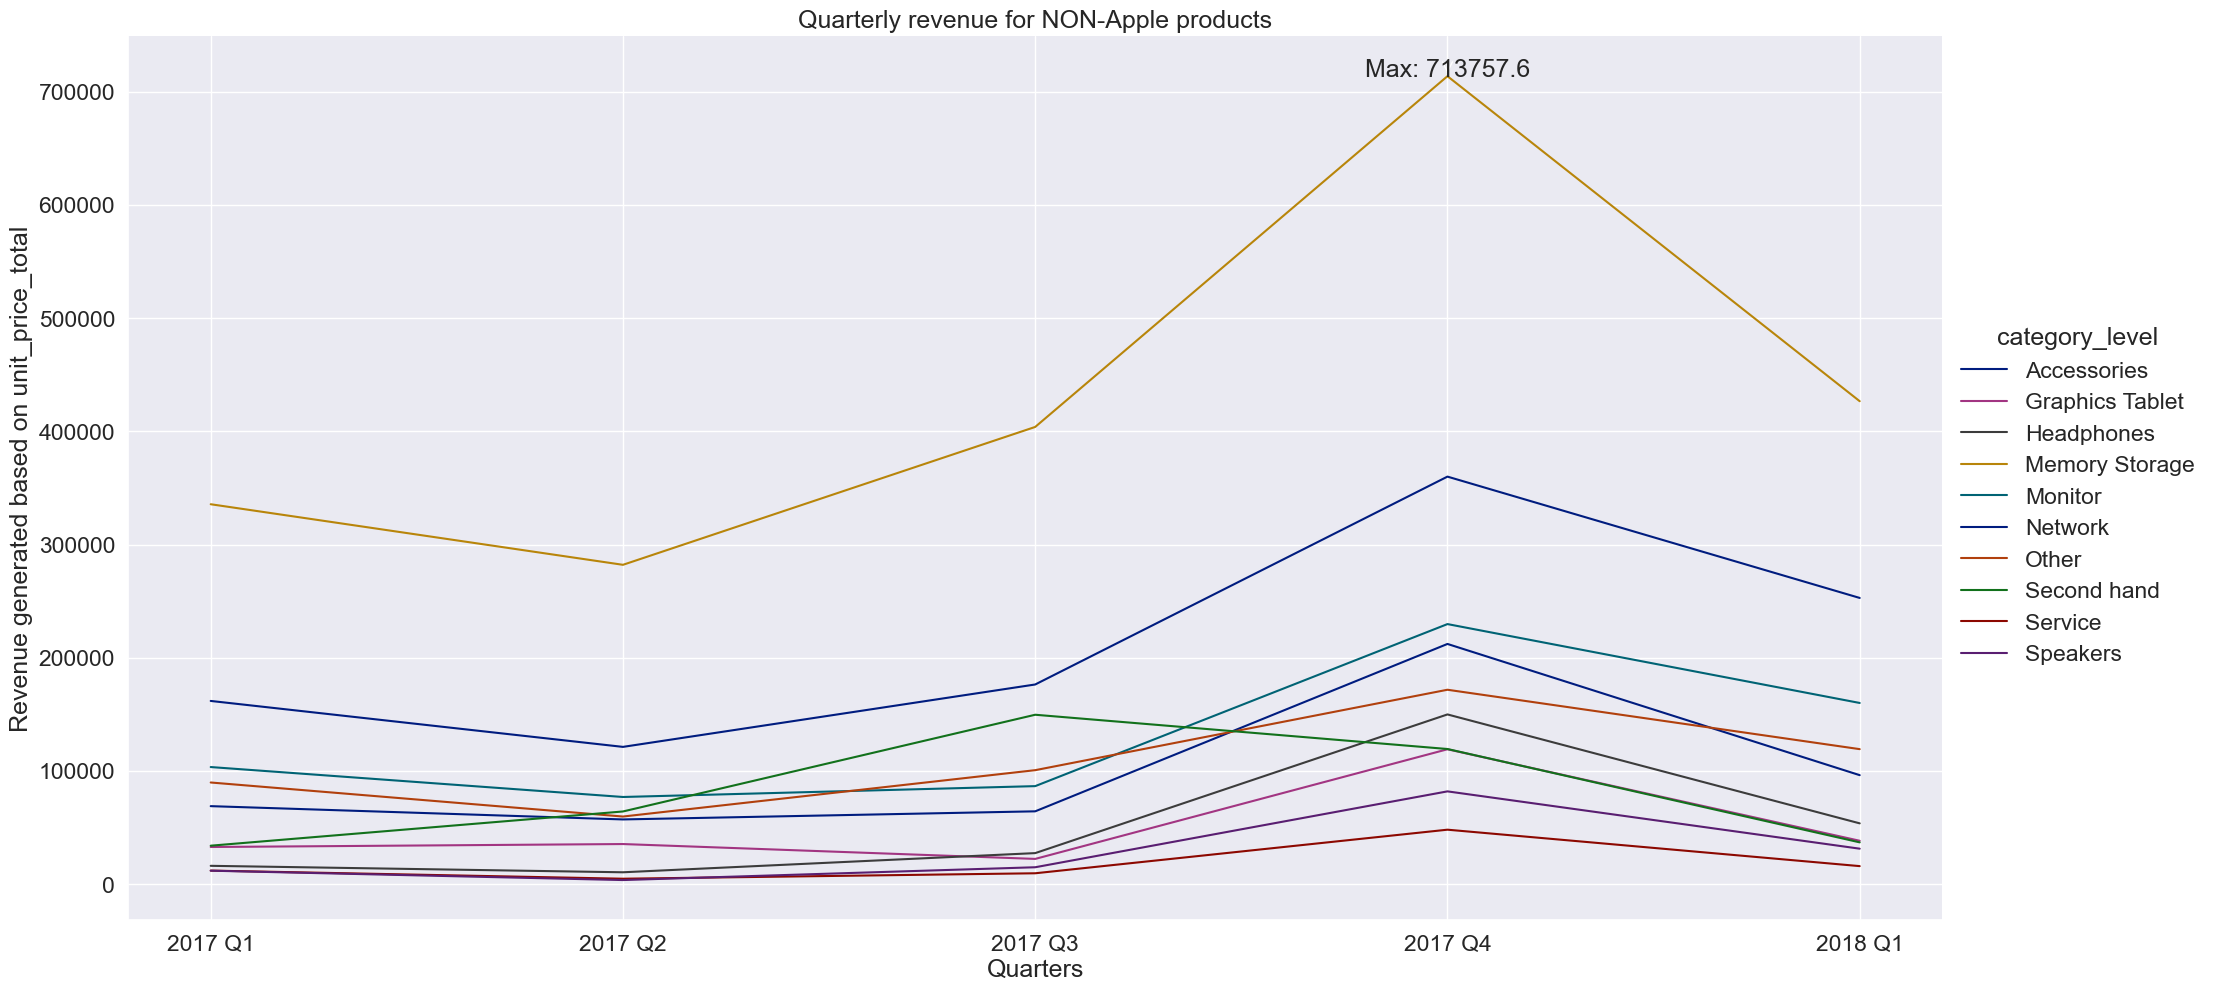

In [70]:
sns.set_theme(style="darkgrid")
sns.set(font_scale=1.5)
sns.set_palette("tab20")

(
sns.relplot(data = Non_Apple_unit_price_total_df,
            x="year_quarter_",
            y='unit_price_total_sum',
            hue="category_level",
            kind="line",
            height= 10,
            palette=color_mapping,
            aspect=2)
    .set_axis_labels("Quarters",
                     "Revenue generated based on unit_price_total")
    .set(title="Quarterly revenue for NON-Apple products")
    .set(xticklabels=["2017 Q1", "2017 Q2", "2017 Q3", "2017 Q4", "2018 Q1"])
);

plt.xticks([1, 2, 3, 4, 5]);

# Find the peak position
peak_x = Non_Apple_unit_price_total_df["year_quarter_"][Non_Apple_unit_price_total_df['unit_price_total_sum'].idxmax()]
peak_y = Non_Apple_unit_price_total_df['unit_price_total_sum'].max()

# Annotate the peak position
plt.annotate(f'Max: {peak_y}', xy=(peak_x, peak_y), xytext=(peak_x, peak_y+1.5),
             arrowprops=dict(facecolor='black', arrowstyle="->"), ha='center')


Text(4, 713759.1, 'Max: 713757.6')

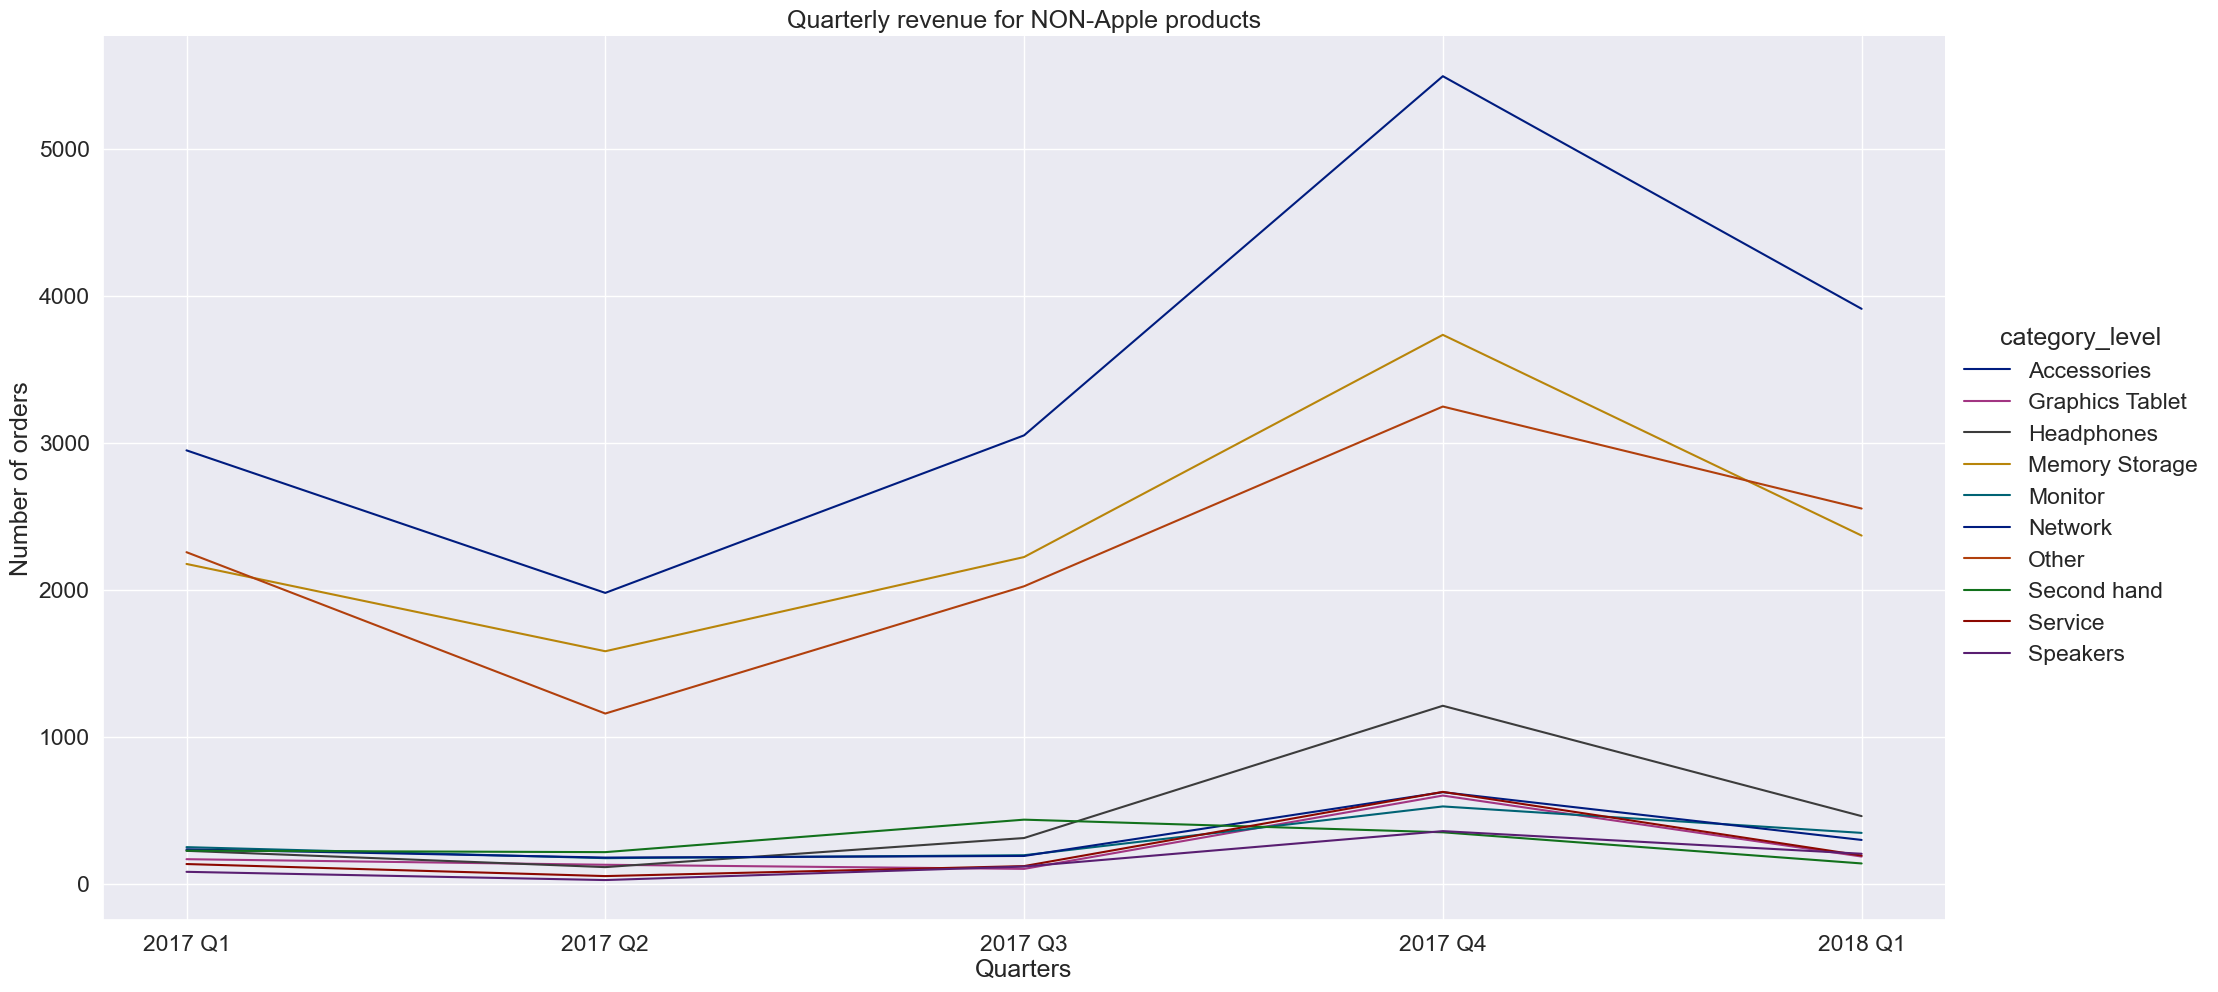

In [71]:
sns.set_theme(style="darkgrid")
sns.set(font_scale=1.5)
sns.set_palette("tab20")

(
sns.relplot(data = Non_Apple_unit_price_total_df,
            x="year_quarter_",
            y='unit_price_total_count',
            hue="category_level",
            kind="line",
            height= 10,
            palette=color_mapping,
            aspect=2)
    .set_axis_labels("Quarters",
                     "Number of orders")
    .set(title="Quarterly revenue for NON-Apple products")
    .set(xticklabels=["2017 Q1", "2017 Q2", "2017 Q3", "2017 Q4", "2018 Q1"])
);

plt.xticks([1, 2, 3, 4, 5]);

# Find the peak position
peak_x = Non_Apple_unit_price_total_df["year_quarter_"][Non_Apple_unit_price_total_df['unit_price_total_sum'].idxmax()]
peak_y = Non_Apple_unit_price_total_df['unit_price_total_sum'].max()

# Annotate the peak position
plt.annotate(f'Max: {peak_y}', xy=(peak_x, peak_y), xytext=(peak_x, peak_y+1.5),
             arrowprops=dict(facecolor='black', arrowstyle="->"), ha='center')

### 2.8.&nbsp; Total paid & discount daily & quarterly:

In [72]:
all_orderlines_together.sample(1)

,id,id_order,product_id,product_quantity,sku,unit_price,date,order_id,created_date,total_paid,...,in_stock,type,category,category_level,unit_price_total,discount,quarter,year,short,year_quarter
5773,1166501,317847,0,1,LOG0214,123.49,2017-01-30 22:32:08,317847,2017-01-30 22:48:36,128.48,...,1,12575403,other,Other,123.49,15.51,1,2017,LOG,1


In [73]:
discount_yq_df = (
    all_orderlines_together
    .groupby(["year_quarter"])
    .agg({"discount": "sum"})
)

In [74]:
discount_yq_df=discount_yq_df.reset_index()

In [75]:
discount_yq_df.sample(1)

,year_quarter,discount
0,1,188089.78


Text(4, 524044.39999999997, 'Max: 524042.89999999997')

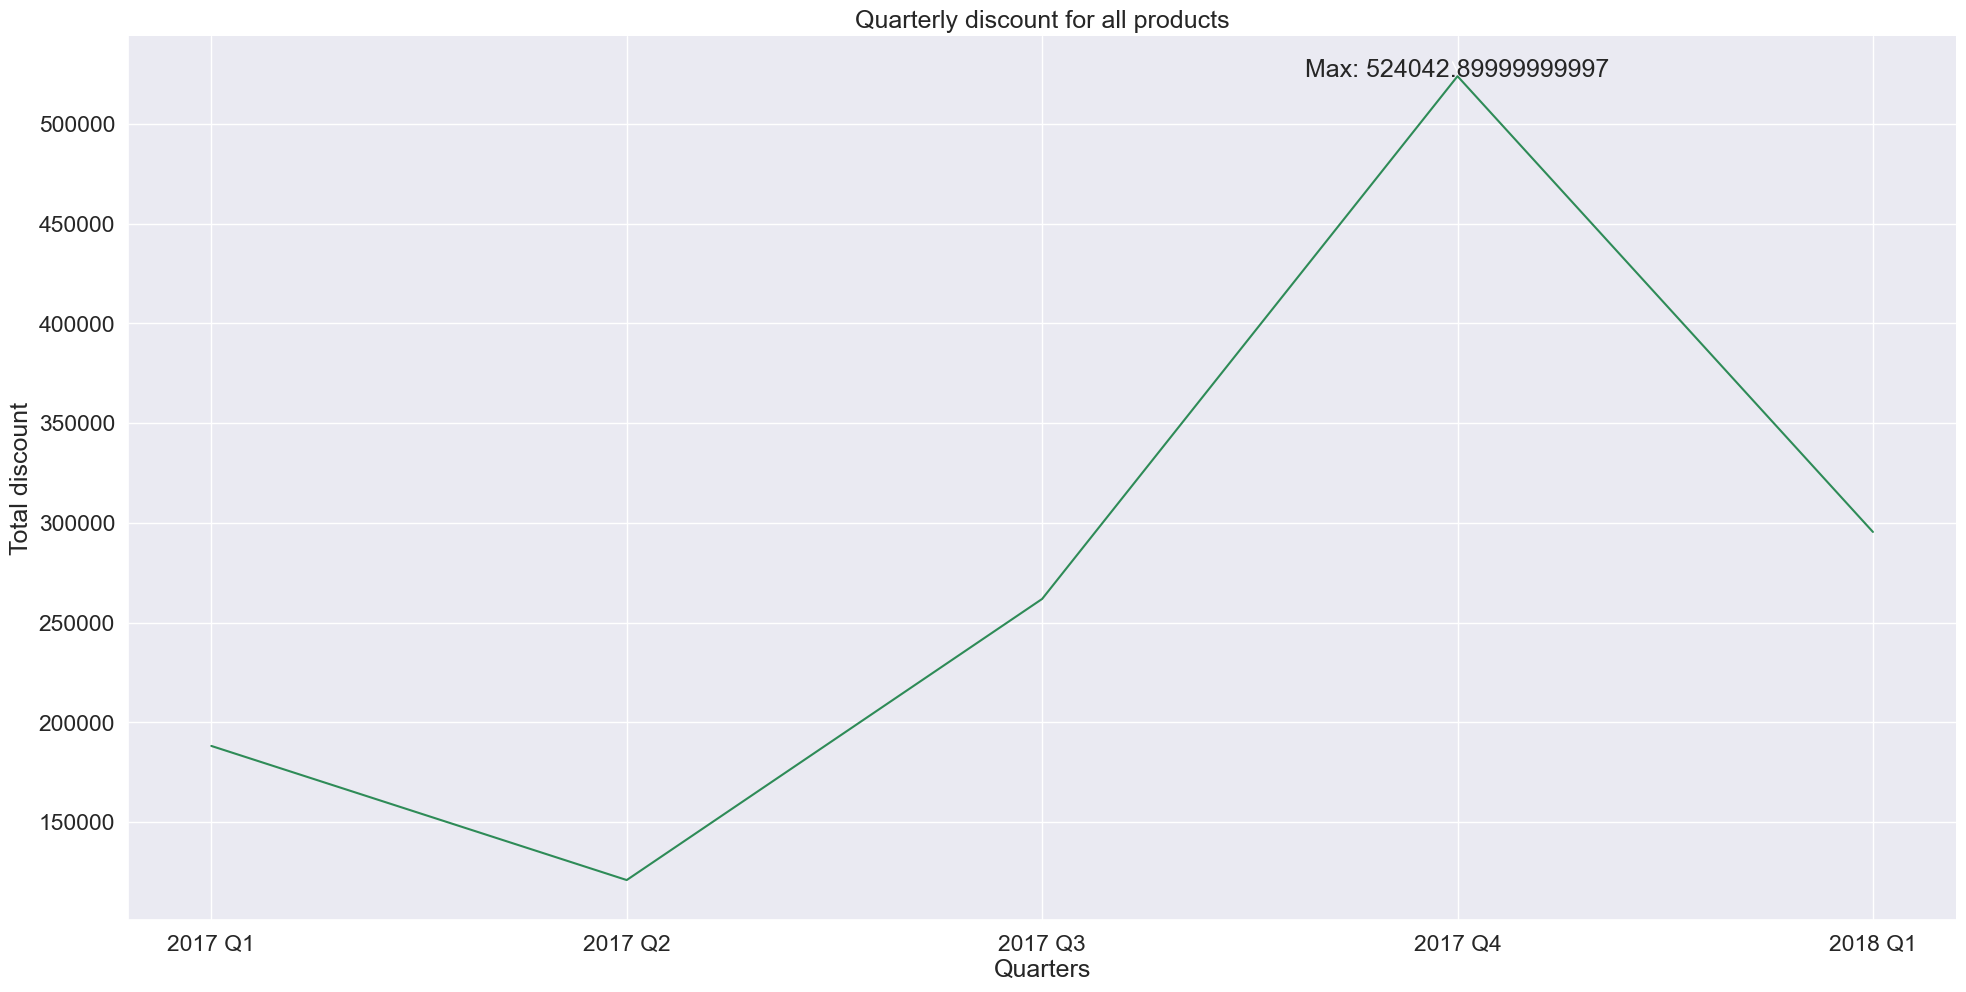

In [ ]:
sns.set_theme(style="darkgrid")
sns.set(font_scale=1.5)

(
sns.relplot(data = discount_yq_df,
            x="year_quarter",
            y='discount',
            kind="line",
            height= 10,
            color="seagreen",
            aspect=2)
    .set_axis_labels("Quarters",
                     "Total discount")
    .set(title="Quarterly discount for all products")
    .set(xticklabels=["2017 Q1", "2017 Q2", "2017 Q3", "2017 Q4", "2018 Q1"])
);

plt.xticks([1, 2, 3, 4, 5]);

# Find the peak position
peak_x = discount_yq_df["year_quarter"][discount_yq_df['discount'].idxmax()]
peak_y = discount_yq_df['discount'].max()

# Annotate the peak position
plt.annotate(f'Max: {peak_y}', xy=(peak_x, peak_y), xytext=(peak_x, peak_y+1.5),
             arrowprops=dict(facecolor='black', arrowstyle="->"), ha='center')

In [77]:
all_orderlines_together["date"] = all_orderlines_together["date"].dt.date

In [78]:
discount_daily_df = (
    all_orderlines_together
    .groupby(["date"])
    .agg({"discount": "sum"})
)

In [79]:
discount_daily_df.sample(1)

,discount
date,
2017-12-11,4702.43


In [80]:
discount_daily_df=discount_daily_df.reset_index()

Text(2017-11-24, 68792.28, 'Max: 68790.78')

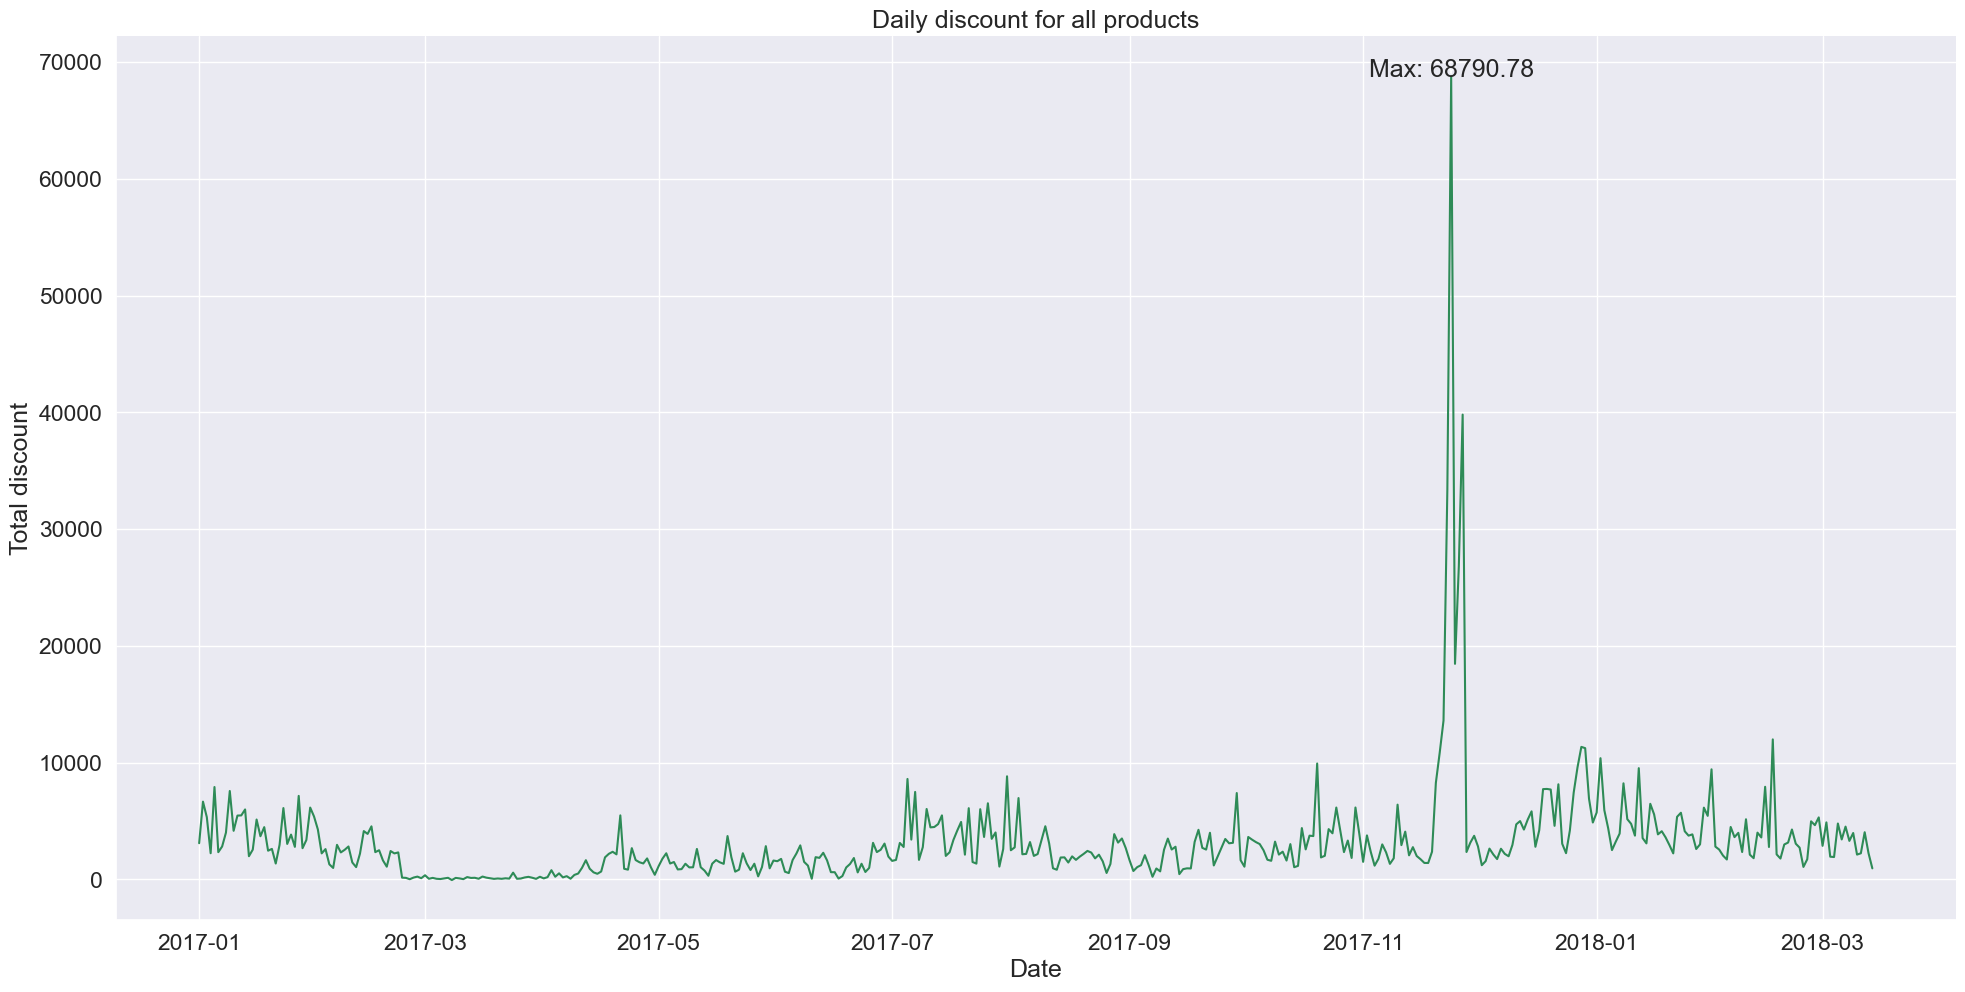

In [ ]:
sns.set_theme(style="darkgrid")
sns.set(font_scale=1.5)

(
sns.relplot(data = discount_daily_df,
            x="date",
            y='discount',
            kind="line",
            height= 10,
            color="seagreen",
            aspect=2)
    .set_axis_labels("Date",
                     "Total discount")
    .set(title="Daily discount for all products")
);

# Find the peak position
peak_x = discount_daily_df["date"][discount_daily_df['discount'].idxmax()]
peak_y = discount_daily_df['discount'].max()

# Annotate the peak position
plt.annotate(f'Max: {peak_y}', xy=(peak_x, peak_y), xytext=(peak_x, peak_y+1.5),
             arrowprops=dict(facecolor='black', arrowstyle="->"), ha='center')

### 2.9.&nbsp; Total revenue from unit_price_total:

In [82]:
unit_price_total_df = (
    all_orderlines_together
    .groupby(["year_quarter"])
    .agg({"unit_price_total": "sum"})
)

In [83]:
unit_price_total_df=unit_price_total_df.reset_index()

In [84]:
unit_price_total_df.sample(1)

,year_quarter,unit_price_total
1,2,847211.9


Text(4, 3034981.41, 'Max: 3034979.91')

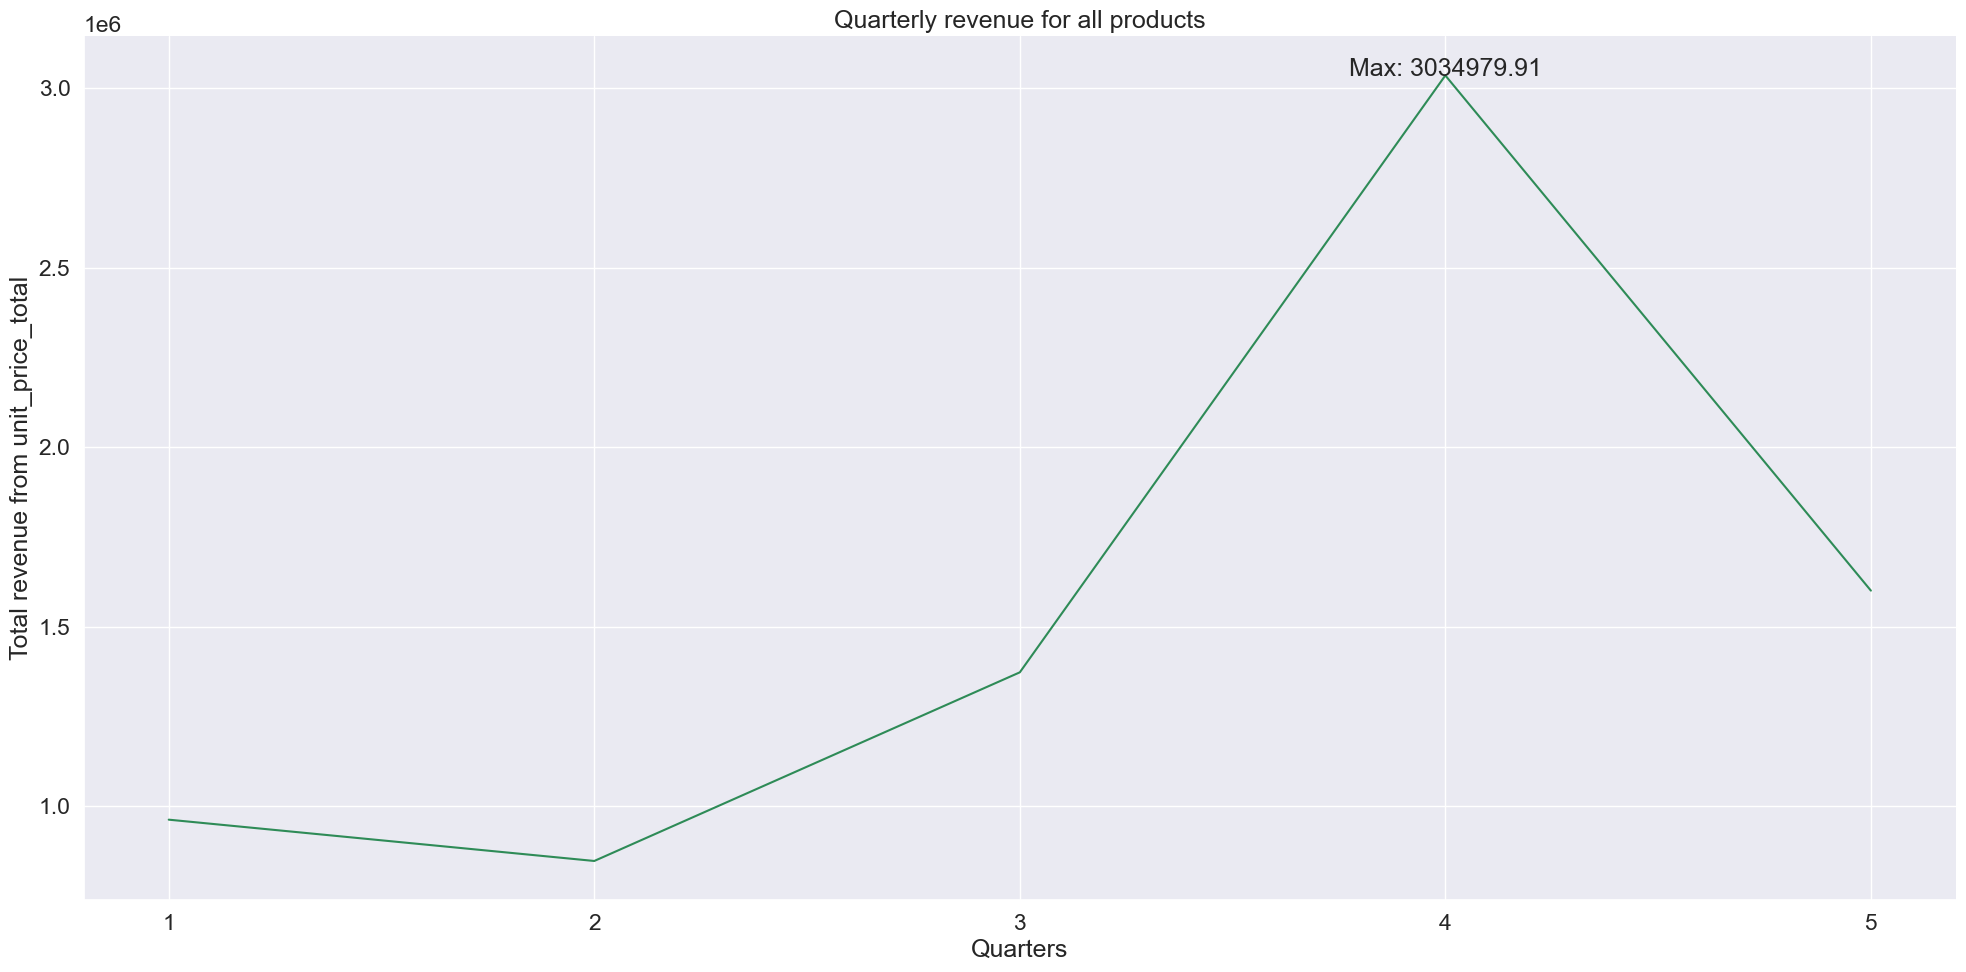

In [ ]:
sns.set_theme(style="darkgrid")
sns.set(font_scale=1.5)

(
sns.relplot(data = unit_price_total_df,
            x="year_quarter",
            y='unit_price_total',
            kind="line",
            height= 10,
            color="seagreen",
            aspect=2)
    .set_axis_labels("Quarters",
                     "Total revenue from unit_price_total")
    .set(title="Quarterly revenue for all products")
);

plt.xticks([1, 2, 3, 4, 5]);

# Find the peak position
peak_x = unit_price_total_df["year_quarter"][unit_price_total_df['unit_price_total'].idxmax()]
peak_y = unit_price_total_df['unit_price_total'].max()

# Annotate the peak position
plt.annotate(f'Max: {peak_y}', xy=(peak_x, peak_y), xytext=(peak_x, peak_y+1.5),
             arrowprops=dict(facecolor='black', arrowstyle="->"), ha='center')

### 2.10.&nbsp; Discount & Total revenue together:

In [86]:
unit_price_total_df.sample(1)

,year_quarter,unit_price_total
4,5,1600168.22


In [87]:
discount_yq_df.sample(1)

,year_quarter,discount
0,1,188089.78


In [88]:
unit_price_total_discount_yq_df = discount_yq_df.merge(unit_price_total_df,
                                           how="inner",
                                           left_on="year_quarter",
                                           right_on="year_quarter")

In [89]:
unit_price_total_discount_yq_df.sample(1)

,year_quarter,discount,unit_price_total
0,1,188089.78,962253.13


Text(4, 3034981.41, 'Max: 3034979.91')

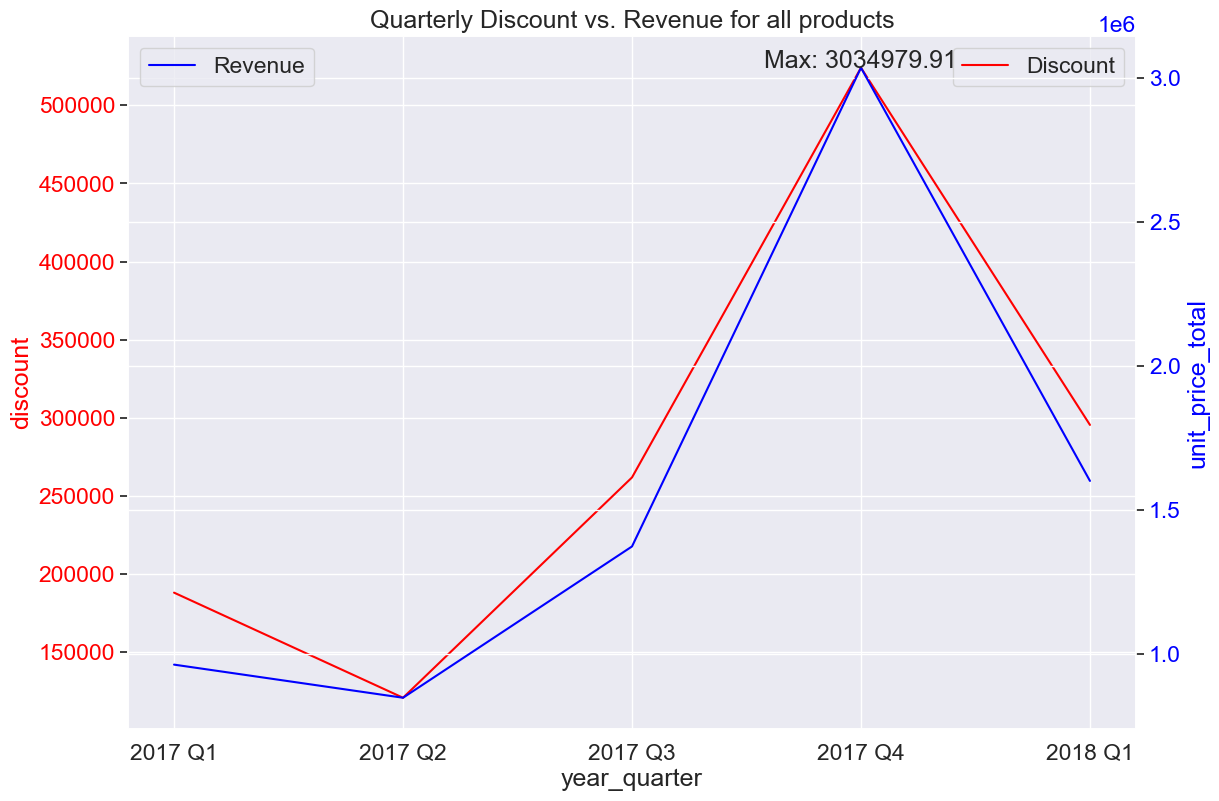

In [ ]:
sns.set_theme(style="darkgrid")
sns.set(font_scale=1.5)

# Create a figure and axis for the left y-axis
fig, ax1 = plt.subplots(figsize=(13, 9))

# Plot A on the left y-axis
(
    sns.lineplot(x='year_quarter', y='discount', data=unit_price_total_discount_yq_df, ax=ax1, color='red', label='Discount')
    )

# Set custom x-tick labels
ax1.set_xticks([1, 2, 3, 4, 5])  # Set positions of ticks
ax1.set_xticklabels(['2017 Q1', '2017 Q2', '2017 Q3', '2017 Q4', '2018 Q1'], rotation=0)  # Custom labels with rotation

ax1.set_ylabel('discount', color='red')
ax1.tick_params(axis='y', labelcolor='red')

# Find the peak position
peak_x = unit_price_total_df["year_quarter"][unit_price_total_df['unit_price_total'].idxmax()]
peak_y = unit_price_total_df['unit_price_total'].max()

# Create a twin axis for the right y-axis
ax2 = ax1.twinx()

# Plot B on the right y-axis
sns.lineplot(x='year_quarter', y='unit_price_total', data=unit_price_total_discount_yq_df, ax=ax2, color='blue', label='Revenue')
ax2.set_ylabel('unit_price_total', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

# Add labels and title
ax1.set_xlabel('year_quarter')
plt.title('Quarterly Discount vs. Revenue for all products')

# Annotate the peak position
plt.annotate(f'Max: {peak_y}', xy=(peak_x, peak_y), xytext=(peak_x, peak_y+1.5),
             arrowprops=dict(facecolor='black', arrowstyle="->"), ha='center')

### 2.11.&nbsp; Discount & Total revenue (from total_paid) together:

In [91]:
orders_info = (orders_qu_df.merge(orderlines_qu_df,
                               how="left",
                               left_on = "order_id",
                               right_on = "id_order"))
orders_info.loc[:,"quarter"] = orders_info["date"].dt.quarter
orders_info.loc[:,"year"] = orders_info["date"].dt.year

In [92]:
orders_info.sample(1)

,order_id,created_date,total_paid,state,id,id_order,product_id,product_quantity,sku,unit_price,date,quarter,year
29680,428632,2017-11-21 12:44:16,30.98,Completed,1418299,428632,0,1,BEL0371,23.99,2017-11-21 12:32:58,4,2017


In [93]:
orders_info['year_quarter'] = ''

In [94]:
year_quarter_mask=orders_info['year'] == 2018
orders_info.loc[year_quarter_mask, 'year_quarter'] = 5

In [96]:
year_quarter_mask2=orders_info['year'] == 2017
orders_info.loc[year_quarter_mask2, 'year_quarter'] = orders_info["quarter"]

In [97]:
orders_info.sample(1)

,order_id,created_date,total_paid,state,id,id_order,product_id,product_quantity,sku,unit_price,date,quarter,year,year_quarter
32393,439003,2017-11-24 13:20:36,66.88,Completed,1436941,439003,0,1,APP1190,51.0,2017-11-24 13:09:26,4,2017,4


In [98]:
total_paid_df = (
    orders_info
    .groupby(["year_quarter"])
    .agg({"total_paid": "sum"})
)

In [99]:
total_paid_df=total_paid_df.reset_index()

In [100]:
total_paid_df.sample(1)

,year_quarter,total_paid
0,1,1506626.22


In [101]:
discount_yq_df.sample(1)

,year_quarter,discount
1,2,120815.5


In [102]:
total_paid_discount_yq_df = discount_yq_df.merge(total_paid_df,
                                           how="inner",
                                           left_on="year_quarter",
                                           right_on="year_quarter")

In [103]:
total_paid_discount_yq_df.sample(1)

,year_quarter,discount,total_paid
0,1,188089.78,1506626.22


Text(0.38, 0.85, 'Maximum of Discount: 524042.89999999997 & Maximum of Revenue: 4597771.29')

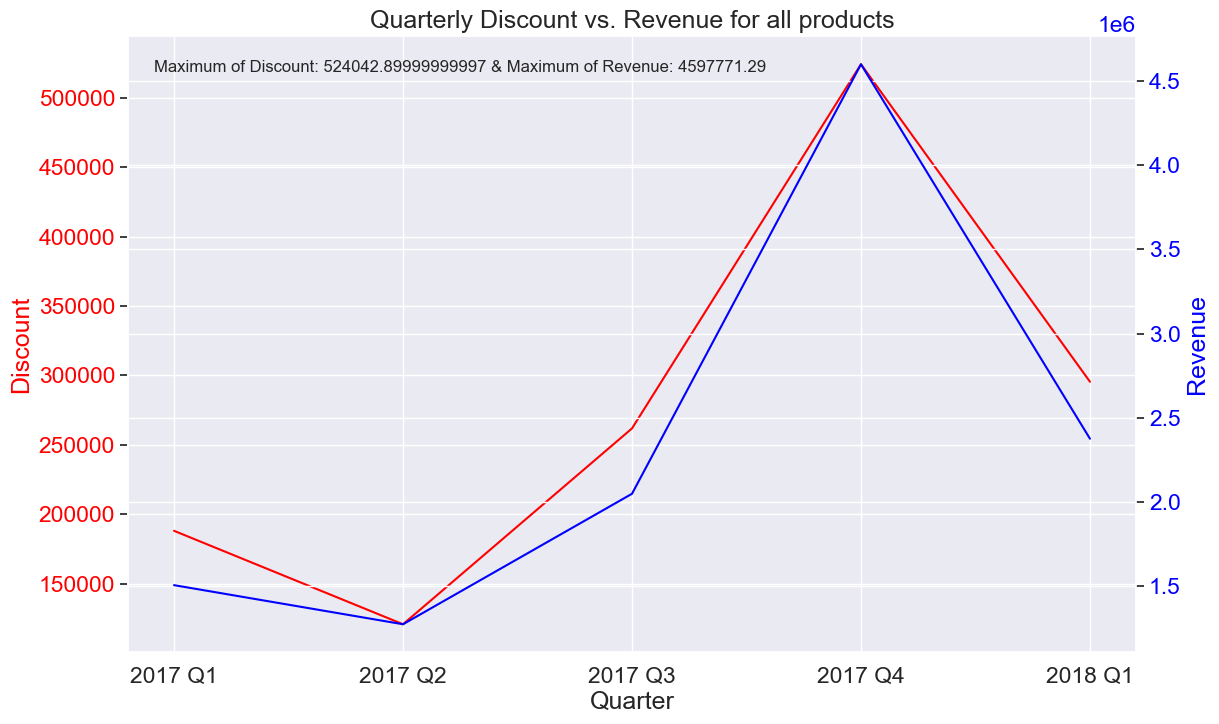

In [119]:
sns.set_theme(style="darkgrid")
sns.set(font_scale=1.5)

# Create a figure and axis for the left y-axis
fig, ax1 = plt.subplots(figsize=(13, 8))

# Plot A on the left y-axis
(
    sns.lineplot(x='year_quarter', y='discount', data=total_paid_discount_yq_df, ax=ax1, color='red'
                 )
    )

# Set custom x-tick labels
ax1.set_xticks([1, 2, 3, 4, 5])  # Set positions of ticks
ax1.set_xticklabels(['2017 Q1', '2017 Q2', '2017 Q3', '2017 Q4', '2018 Q1'], rotation=0)  # Custom labels with rotation

ax1.set_ylabel('Discount', color='red')
ax1.tick_params(axis='y', labelcolor='red')

# Find the peak for A
max_discount = total_paid_discount_yq_df['discount'].max()
max_discount_x = total_paid_discount_yq_df.loc[total_paid_discount_yq_df['discount'].idxmax(), 'year_quarter']

# Create a twin axis for the right y-axis
ax2 = ax1.twinx()

# Plot B on the right y-axis
sns.lineplot(x='year_quarter', y='total_paid', data=total_paid_discount_yq_df, ax=ax2, color='blue'
             )
ax2.set_ylabel('Revenue', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

# Find the peak for B
max_total_paid = total_paid_discount_yq_df['total_paid'].max()
max_total_paid_x = total_paid_discount_yq_df.loc[total_paid_discount_yq_df['total_paid'].idxmax(), 'year_quarter']

# Add labels and title
ax1.set_xlabel('Quarter')
plt.title('Quarterly Discount vs. Revenue for all products', y=1)
plt.suptitle(f'Maximum of Discount: {max_discount} & Maximum of Revenue: {max_total_paid}', 
             fontsize=12, x=0.38, y=0.85)

Text(0.5, 1, 'Quarterly Discount vs. Revenue for all products')

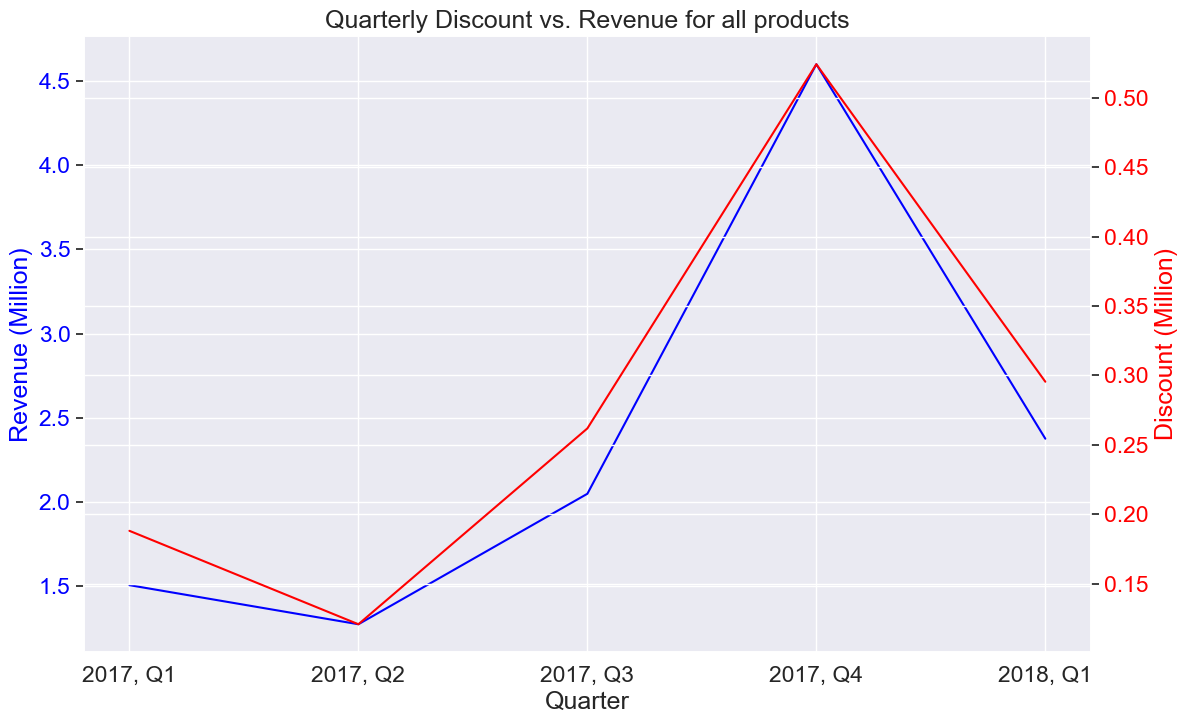

In [120]:
from matplotlib.ticker import FuncFormatter
sns.set_theme(style="darkgrid")
sns.set(font_scale=1.5)
#sns.set_palette("tab20")

# Create a figure and axis for the left y-axis
fig, ax1 = plt.subplots(figsize=(13, 8))

# Function to format ticks in millions
def millions_formatter(decimals):
    def formatter(x, pos):
        return f'{x / 1_000_000:.{decimals}f}'
    return formatter

# Plot B on the right y-axis
sns.lineplot(x='year_quarter', y='total_paid', data=total_paid_discount_yq_df, ax=ax1, color='blue'
             #, label='Revenue'
             )
ax1.set_ylabel('Revenue (Million)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Apply millions formatter to the left y-axis
ax1.yaxis.set_major_formatter(FuncFormatter(millions_formatter(1)))


ax2 = ax1.twinx()



# Plot A on the left y-axis
(
    sns.lineplot(x='year_quarter', y='discount', data=total_paid_discount_yq_df, ax=ax2, color='red'
                 #, label='Discount'
                 )
    )

# Set custom x-tick labels
ax2.set_xticks([1, 2, 3, 4, 5])  # Set positions of ticks
ax2.set_xticklabels(['2017, Q1', '2017, Q2', '2017, Q3', '2017, Q4', '2018, Q1'], rotation=0)  # Custom labels with rotation

ax2.set_ylabel('Discount (Million)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Apply millions formatter to the right y-axis
ax2.yaxis.set_major_formatter(FuncFormatter(millions_formatter(2)))

# Add labels and title
ax1.set_xlabel('Quarter')
plt.title('Quarterly Discount vs. Revenue for all products', y=1)
#plt.suptitle(f'Maximum of Discount: {max_discount} & Maximum of Revenue: {max_total_paid}', fontsize=12, x=0.38, y=0.85)


### 2.12.&nbsp; Overall sales by category

In [106]:
all_orderlines_together.sample(1)

,id,id_order,product_id,product_quantity,sku,unit_price,date,order_id,created_date,total_paid,...,in_stock,type,category,category_level,unit_price_total,discount,quarter,year,short,year_quarter
43479,1543846,484351,0,1,XDO0039,22.99,2018-01-07,484351,2018-01-07 16:55:20,49.96,...,0,2434,other,Other,22.99,7.0,1,2018,XDO,5


In [107]:
product_quantity_category_level_df = (
    all_orderlines_together
    .groupby("category_level")
    .agg({"product_quantity": ["sum"]})
)

In [108]:
product_quantity_category_level_df=product_quantity_category_level_df.reset_index()

In [109]:
product_quantity_category_level_df.columns = ['_'.join(col).strip() for col in product_quantity_category_level_df.columns.values]

In [110]:
product_quantity_category_level_df.rename(columns={"category_level_": "category_level"}, inplace=True)

In [111]:
product_quantity_category_level_df.sample(1)

,category_level,product_quantity_sum
4,Apple iPad,553


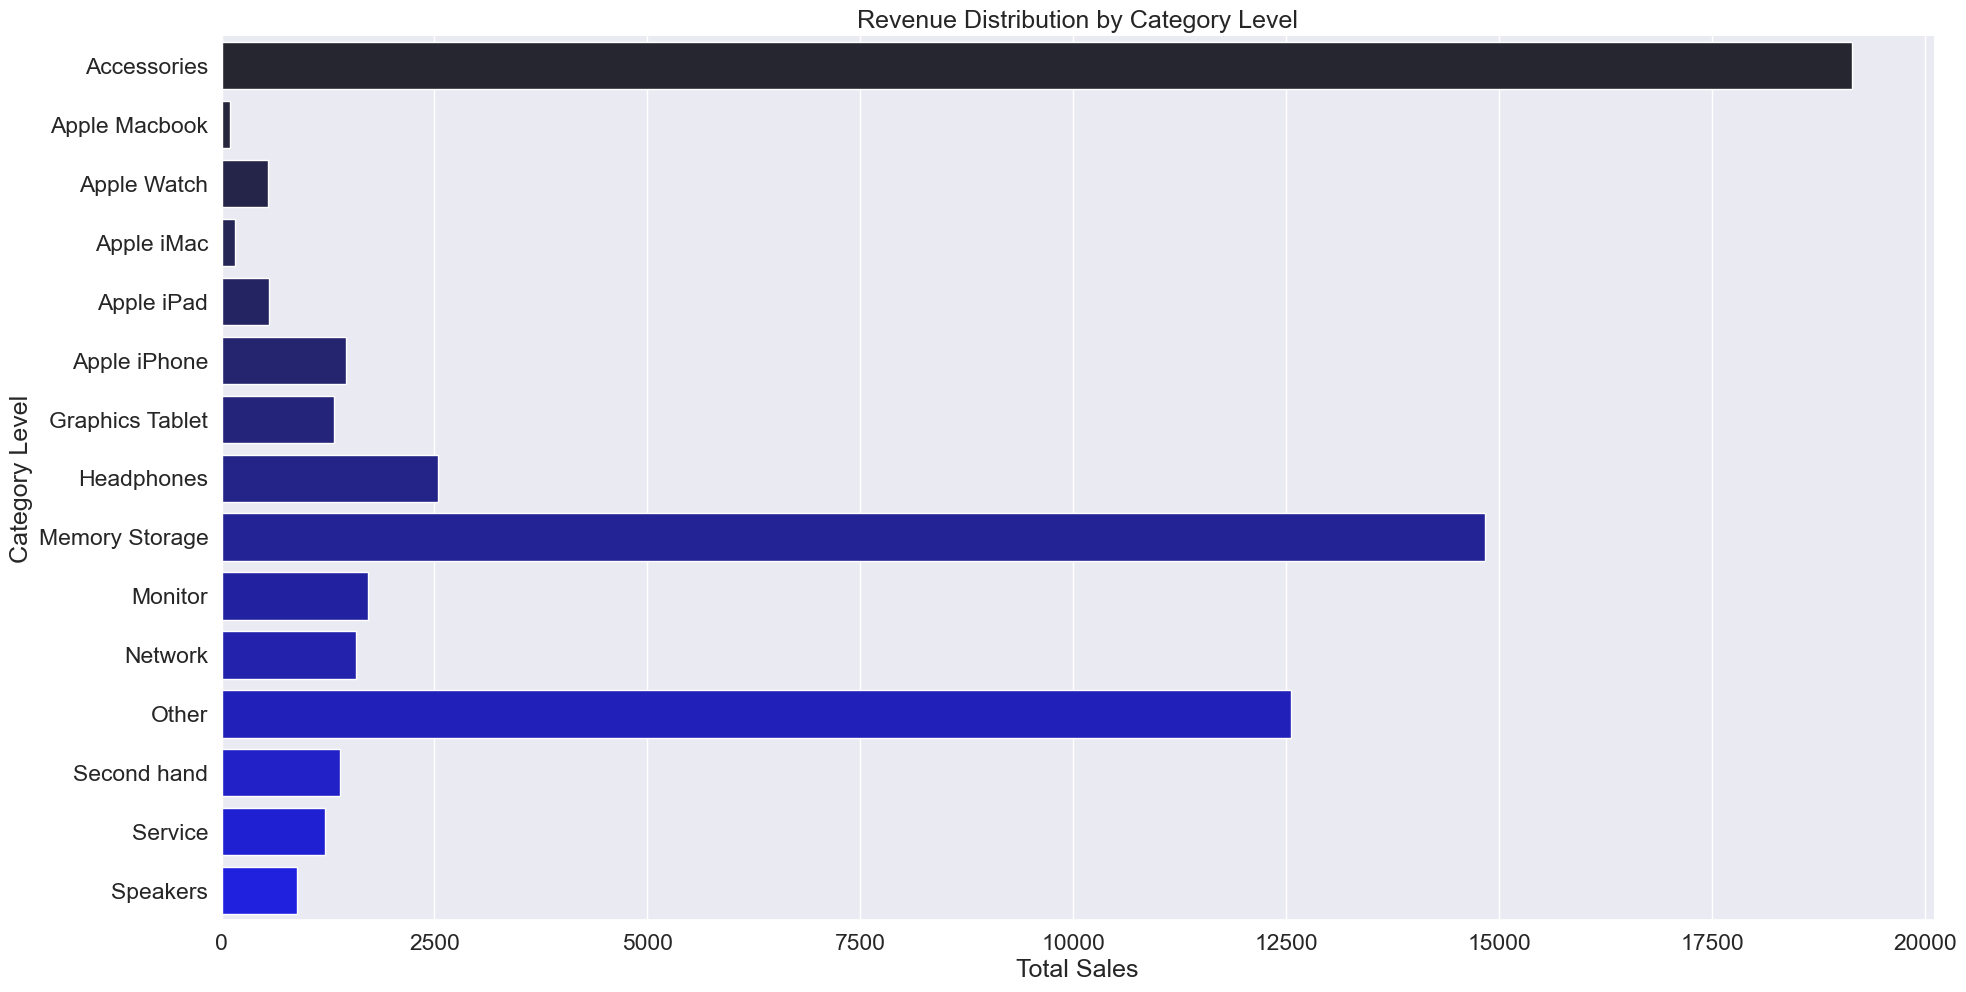

In [ ]:
sns.set_theme(style="darkgrid")
sns.set(font_scale=1.5)

(
sns.catplot(data = product_quantity_category_level_df,
            x="product_quantity_sum",
            y='category_level',
            hue="category_level",
            kind="bar",
            height= 10,
            color="blue",
            aspect=2)
    .set_axis_labels("Total Sales",
                     "Category Level")
    .set(title="Revenue Distribution by Category Level")
);

In [114]:
product_quantity_category_level_df["product_quantity_sum"].sum()

np.int64(60011)

In [115]:
product_quantity_category_level_df["Percentage_product_quantity_sum"]=""

In [116]:
product_quantity_category_level_df["Percentage_product_quantity_sum"] = (product_quantity_category_level_df["product_quantity_sum"] / product_quantity_category_level_df["product_quantity_sum"].sum()) * 100

In [117]:
product_quantity_category_level_df

,category_level,product_quantity_sum,Percentage_product_quantity_sum
0,Accessories,19147,31.905817
1,Apple Macbook,102,0.169969
2,Apple Watch,549,0.914832
3,Apple iMac,164,0.273283
4,Apple iPad,553,0.921498
5,Apple iPhone,1462,2.436220
6,Graphics Tablet,1317,2.194598
7,Headphones,2541,4.234224
8,Memory Storage,14834,24.718802
9,Monitor,1722,2.869474
